### In this project, we are going to scrape used cars in cars.com and then perform an analysis on this dataset. 

### Web Scrape cars.com
We are going to scrape 6 types of cars in Irvine and Riverside. We are scraping three pages of each cars. 

Luxury cars: 
- porsche-macan
- bmws x3
- A4 Audi’s

Economy cars: 
- Nissan Sentras
- Ford Focus
- Chevy Malibu

#### Import necessary packages for web scraping

In [ ]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen

#### Define function
We will be scraping 'Vin', 'Year', 'Car description', 'Price', 'Mileage', 'Exterior color','Interior color', 'Transmission', 'Drivetrain', 'Link' of each car.


In [2]:
def getlink(url):

  links = []
  desc = []
  price = []
  mileage = []
  basic_info=[]
  yr = re.compile(r'\s?\d{4}')
  price_match = re.compile('"price":\d+')
  end_price = re.compile('\d+\w')
  step2 = []
  step3 = []
  price = []
  year = []

  #url ='https://www.cars.com/for-sale/searchresults.action/?zc=92617&rd=10&stkTypId=28881&mkId=28263&searchSource=RESEARCH_SHOP_INDEX'
  response = requests.get(url)
  page = response.text
  soup = BeautifulSoup(page, 'lxml')
  all_matches1 = soup.find_all('div',{'class':'shop-srp-listings__listing-container'})
  for each in all_matches1:
      for link in each.find_all('a'):
          if link.has_attr('href'):       
              print ('https://www.cars.com'+link.attrs['href'])
              links.append('https://www.cars.com'+link.attrs['href'])

  for each in links:
      url = each
      response = requests.get(url)
      page = response.text
      cars = BeautifulSoup(page, 'lxml')

      car_desc = (cars.findAll('h1', class_='cui-heading-2--secondary vehicle-info__title'))
      for each in car_desc:
          desc.append(each.text)
          year_ = str(each.text)
          years = re.findall(yr, year_)
          for each in years:
              year.append(each)
            
      car_price = cars.findAll('div', attrs={'ng-if':['!ctrl.anyVdpTestActive']})
      #convert the result to a searchable string
      step1 = str(car_price)
            
      #find all "price:xxx"
      prices_1 = re.findall(price_match, step1)
            
      #break up the string to isolate the price
      for each in prices_1:
            step2.append(each)

      car_mileage = cars.findAll('div', class_='vdp-cap-price__mileage--mobile vehicle-info__mileage')
      for each in car_mileage:
          mile=each.get_text().replace('miles','')
          mile1=mile.replace(',','')
          mileage.append(mile1)
          
      # get the vin 
      basic_detail=cars.findAll('li',class_='vdp-details-basics__item')
      for each in basic_detail:
          info=each.span.text
          basic_info.append(info)

          pattern=re.compile(r'[0-9a-zA-Z]{17,}')
          vin = [x for x in basic_info if re.search(pattern, x)]

  all_matches = soup.find_all(
      'div', {'class': 'shop-srp-listings__listing-container'})


  keys = ['Ext. Color', 'Int. Color', 'Transmission', 'Drivetrain']

  outputs = dict()

  for each in all_matches:
      info = each.findAll('ul', class_='listing-row__meta')
      # regular expression for strong tag
      matches = dict(re.findall(
          r'(?is)<strong>\s*([^<:]*?)\s*:\s*<\/strong>\s*([^<]*?)\s*<', str(info[0])))

      for item in matches.items():
          #print(item)
          if item[0] not in outputs:
              outputs[item[0]] = [item[1]]
          if item[0] in keys:
              outputs[item[0]].append(item[1])

  for each in step2:
      step3.append(each.split(':'))
        
  for each in step3:
      price.append(each[1])
        
  #print(outputs)
  exterior_color=outputs['Ext. Color']
  interior_color=outputs['Int. Color']
  transmission=outputs['Transmission']
  drivetrain=outputs['Drivetrain']

  # since each of the first item is repeated, so let's drop it
  new_exterior_color=exterior_color[1:]
  new_interior_color=interior_color[1:]
  new_transmission=transmission[1:]
  new_drivetrain=drivetrain[1:]

  dataframe = pd.DataFrame(list(zip(year, vin,desc,price, mileage,new_exterior_color,new_interior_color,new_transmission,new_drivetrain,links)),
                        columns=['Year','Vin','Car description','Price', 'Mileage','Exterior color','Interior color','Transmission','Drivetrain','Link'])
  
  dataframe['Price']=dataframe['Price'].astype(str).astype(int)
  dataframe['Mileage']=dataframe['Mileage'].astype(str).astype(int)
  dataframe['Car description']=dataframe['Car description'].astype(str)
  
  return dataframe 

In [4]:
# Porsche irvine page 1
df_irvine_porsche1=getlink('https://www.cars.com/for-sale/searchresults.action/?mdId=56014&mkId=20081&rd=10&searchSource=QUICK_FORM&zc=92617')
df_irvine_porsche1

https://www.cars.com/vehicledetail/detail/783361476/overview/
https://www.cars.com/vehicledetail/detail/764761124/overview/
https://www.cars.com/vehicledetail/detail/777242508/overview/
https://www.cars.com/vehicledetail/detail/777777663/overview/
https://www.cars.com/vehicledetail/detail/787898742/overview/
https://www.cars.com/vehicledetail/detail/790306033/overview/
https://www.cars.com/vehicledetail/detail/788612997/overview/
https://www.cars.com/vehicledetail/detail/777351775/overview/
https://www.cars.com/vehicledetail/detail/788040775/overview/
https://www.cars.com/vehicledetail/detail/791845504/overview/
https://www.cars.com/vehicledetail/detail/793305322/overview/
https://www.cars.com/vehicledetail/detail/789803214/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793747464/overview/
https://www.cars.com/vehicledetail/detail/784639071/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791764810/overview/
https://ww

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2019,WP1AB2A50KLB34382,2019 Porsche Macan S,71100,9,White,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7833...
1,2018,WP1AA2A5XJLB23911,2018 Porsche Macan Sport Edition,53900,10,Blue,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7647...
2,2019,WP1AA2A51KLB05590,2019 Porsche Macan,64610,14,Other,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7772...
3,2019,WP1AB2A50KLB31076,2019 Porsche Macan S,73470,10,Silver,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7777...
4,2016,WP1AF2A51GLB95171,Certified 2016 Porsche Macan Turbo,47450,50814,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7878...
5,2020,WP1AA2A54LLB01776,2020 Porsche Macan,60050,43,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7903...
6,2020,WP1AA2A51LLB01587,2020 Porsche Macan,66780,11,White,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7886...
7,2019,WP1AA2A57KLB01575,2019 Porsche Macan,63650,12,Black,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7773...
8,2018,WP1AB2A57JLB33387,2018 Porsche Macan S,49999,27000,White,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7880...
9,2020,WP1AB2A57JLB33387,2020 Porsche Macan S,74380,12,Brown,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7918...


#### Get the dataframe for each car page and export them into CSV

In [5]:
# Porsche irvine page 2
df_irvine_porsche2=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=56014&mkId=20081&page=2&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92617')
df_irvine_porsche2

https://www.cars.com/vehicledetail/detail/793620386/overview/
https://www.cars.com/vehicledetail/detail/791483464/overview/
https://www.cars.com/vehicledetail/detail/777542785/overview/
https://www.cars.com/vehicledetail/detail/792148368/overview/
https://www.cars.com/vehicledetail/detail/791845509/overview/
https://www.cars.com/vehicledetail/detail/790982904/overview/
https://www.cars.com/vehicledetail/detail/792148311/overview/
https://www.cars.com/vehicledetail/detail/788630034/overview/
https://www.cars.com/vehicledetail/detail/790688596/overview/
https://www.cars.com/vehicledetail/detail/793620692/overview/
https://www.cars.com/vehicledetail/detail/794419699/overview/
https://www.cars.com/vehicledetail/detail/792021837/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/763590143/overview/
https://www.cars.com/vehicledetail/detail/793204113/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794202402/overview/?isShippabl

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2017,WP1AF2A5XHLB61067,2017 Porsche Macan Turbo,59500,32435,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7936...
1,2020,WP1AB2A58LLB32879,2020 Porsche Macan S,75960,14,Other,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7914...
2,2019,WP1AA2A55KLB04393,2019 Porsche Macan,63480,9,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7775...
3,2019,WP1AB2A57KLB32953,2019 Porsche Macan S,75680,17,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7921...
4,2020,WP1AB2A56LLB31570,2020 Porsche Macan S,70210,19,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7918...
5,2020,WP1AB2A58LLB31487,2020 Porsche Macan S,77400,13,Black,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7909...
6,2020,WP1AB2A58LLB31621,2020 Porsche Macan S,72090,16,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7921...
7,2019,WP1AB2A52KLB34111,2019 Porsche Macan S,72190,10,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7886...
8,2020,WP1AB2A5XLLB30874,2020 Porsche Macan S,74470,10,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7906...
9,2018,WP1AF2A50JLB71547,2018 Porsche Macan Turbo,81880,8160,Red,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7936...


In [6]:
# Porsche irvine page 3
df_irvine_porsche3=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=56014&mkId=20081&page=3&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92617')
df_irvine_porsche3

https://www.cars.com/vehicledetail/detail/764020706/overview/
https://www.cars.com/vehicledetail/detail/785773623/overview/
https://www.cars.com/vehicledetail/detail/793620385/overview/
https://www.cars.com/vehicledetail/detail/785605316/overview/
https://www.cars.com/vehicledetail/detail/793305307/overview/
https://www.cars.com/vehicledetail/detail/790983333/overview/
https://www.cars.com/vehicledetail/detail/788183228/overview/
https://www.cars.com/vehicledetail/detail/793310655/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793611873/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790688522/overview/
https://www.cars.com/vehicledetail/detail/790983166/overview/
https://www.cars.com/vehicledetail/detail/791748665/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793650175/overview/
https://www.cars.com/vehicledetail/detail/785424086/overview/?isShippableInsideSearchRadius
https://www.

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2018,WP1AA2A55JLB25422,2018 Porsche Macan,51900,15,Blue,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7640...
1,2018,WP1AA2A55JLB19264,Certified 2018 Porsche Macan,41900,9550,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7857...
2,2017,WP1AF2A56HLB60403,Certified 2017 Porsche Macan Turbo,58500,36518,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7936...
3,2018,WP1AA2A50JLB11492,2018 Porsche Macan,41900,16952,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7856...
4,2020,WP1AB2A51LLB33114,2020 Porsche Macan S,75820,18,Red,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7933...
5,2020,WP1AB2A59LLB30543,2020 Porsche Macan S,72500,10,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7909...
6,2018,WP1AA2A52JLB25202,Certified 2018 Porsche Macan,40777,8959,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7881...
7,2018,WP1AA2A59JLB20546,2018 Porsche Macan,49690,13206,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7933...
8,2018,WP1AA2A54JLB17098,2018 Porsche Macan,42210,9586,Black,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7936...
9,2020,WP1AB2A5XLLB31233,2020 Porsche Macan S,74270,10,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7906...


In [55]:
# irvine porsche dataframe
frames=[df_irvine_porsche1,df_irvine_porsche2,df_irvine_porsche3]
irvine_porsche=pd.concat(frames,ignore_index=True)
irvine_porsche['Location']='Irvine'
irvine_porsche['Irvine']=1
irvine_porsche['Riverside']=0
irvine_porsche['Porsche']=1
irvine_porsche['BMW']=0
irvine_porsche['Audi']=0
irvine_porsche['Nissan']=0
irvine_porsche['Ford']=0
irvine_porsche['Chevrolet']=0
irvine_porsche

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link,Location,Irvine,Riverside,Porsche,BMW,Audi,Nissan,Ford,Chevrolet
0,2019,WP1AB2A50KLB34382,2019 Porsche Macan S,71100,9,White,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7833...,Irvine,1,0,1,0,0,0,0,0
1,2018,WP1AA2A5XJLB23911,2018 Porsche Macan Sport Edition,53900,10,Blue,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7647...,Irvine,1,0,1,0,0,0,0,0
2,2019,WP1AA2A51KLB05590,2019 Porsche Macan,64610,14,Other,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7772...,Irvine,1,0,1,0,0,0,0,0
3,2019,WP1AB2A50KLB31076,2019 Porsche Macan S,73470,10,Silver,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7777...,Irvine,1,0,1,0,0,0,0,0
4,2016,WP1AF2A51GLB95171,Certified 2016 Porsche Macan Turbo,47450,50814,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7878...,Irvine,1,0,1,0,0,0,0,0
5,2020,WP1AA2A54LLB01776,2020 Porsche Macan,60050,43,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7903...,Irvine,1,0,1,0,0,0,0,0
6,2020,WP1AA2A51LLB01587,2020 Porsche Macan,66780,11,White,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7886...,Irvine,1,0,1,0,0,0,0,0
7,2019,WP1AA2A57KLB01575,2019 Porsche Macan,63650,12,Black,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7773...,Irvine,1,0,1,0,0,0,0,0
8,2018,WP1AB2A57JLB33387,2018 Porsche Macan S,49999,27000,White,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7880...,Irvine,1,0,1,0,0,0,0,0
9,2020,WP1AB2A57JLB33387,2020 Porsche Macan S,74380,12,Brown,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7918...,Irvine,1,0,1,0,0,0,0,0


In [58]:
irvine_porsche = irvine_porsche[['Vin','Year','Car description','Price','Mileage','Exterior color','Interior color','Transmission','Drivetrain','Location','Irvine','Riverside','Audi','BMW','Chevrolet','Ford','Nissan','Porsche','Link' ]]
irvine_porsche

,Vin,Year,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Location,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,Porsche,Link
0,WP1AB2A50KLB34382,2019,2019 Porsche Macan S,71100,9,White,Other,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7833...
1,WP1AA2A5XJLB23911,2018,2018 Porsche Macan Sport Edition,53900,10,Blue,Black,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7647...
2,WP1AA2A51KLB05590,2019,2019 Porsche Macan,64610,14,Other,Black,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7772...
3,WP1AB2A50KLB31076,2019,2019 Porsche Macan S,73470,10,Silver,Black,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7777...
4,WP1AF2A51GLB95171,2016,Certified 2016 Porsche Macan Turbo,47450,50814,White,Black,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7878...
5,WP1AA2A54LLB01776,2020,2020 Porsche Macan,60050,43,White,Black,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7903...
6,WP1AA2A51LLB01587,2020,2020 Porsche Macan,66780,11,White,Other,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7886...
7,WP1AA2A57KLB01575,2019,2019 Porsche Macan,63650,12,Black,Other,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7773...
8,WP1AB2A57JLB33387,2018,2018 Porsche Macan S,49999,27000,White,Other,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7880...
9,WP1AB2A57JLB33387,2020,2020 Porsche Macan S,74380,12,Brown,Other,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7918...


In [59]:
#Export as CSV
irvine_porschecsv = irvine_porsche.to_csv (r'irvine_porsche.csv', index = None, header=True)

In [10]:
# BMW irvine page 1
df_irvine_bmw1=getlink('https://www.cars.com/for-sale/searchresults.action/?zc=92617&rd=10&mkId=20005&mdId=22310&searchSource=RESEARCH_SHOP_INDEX')
df_irvine_bmw1

https://www.cars.com/vehicledetail/detail/788262647/overview/
https://www.cars.com/vehicledetail/detail/791929426/overview/
https://www.cars.com/vehicledetail/detail/786556021/overview/
https://www.cars.com/vehicledetail/detail/789440149/overview/
https://www.cars.com/vehicledetail/detail/794304443/overview/
https://www.cars.com/vehicledetail/detail/783902626/overview/
https://www.cars.com/vehicledetail/detail/792635096/overview/
https://www.cars.com/vehicledetail/detail/790970867/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793306803/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791847740/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790968349/overview/
https://www.cars.com/vehicledetail/detail/793023214/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/792273361/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/79

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2014,5UXWX7C59E0E77296,2014 BMW X3 xDrive35i,19986,40766,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7882...
1,2017,5UXWZ7C56H0U45840,2017 BMW X3 sDrive28i,24900,27948,Black,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7919...
2,2016,5UXWX7C5XG0R17235,2016 BMW X3 xDrive35i,25900,28686,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7865...
3,2017,5UXWZ7C56H0U45031,2017 BMW X3 sDrive28i,25900,25322,Red,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7894...
4,2017,5UXWZ7C56H0U46938,2017 BMW X3 sDrive28i,24900,28716,White,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7943...
5,2017,5UXWX9C52H0T15118,2017 BMW X3 xDrive28i,27999,23133,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7839...
6,2017,5UXWX9C56H0T10715,Certified 2017 BMW X3 xDrive28i,27888,25494,Black,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7926...
7,2019,5UXTR9C50KLD90521,2019 BMW X3 xDrive30i,32300,31013,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7909...
8,2017,5UXWX9C57H0T10285,2017 BMW X3 xDrive28i,23670,45500,White,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7933...
9,2019,5UXTR7C5XKLF24617,2019 BMW X3 sDrive30i,32630,16945,White,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7918...


In [11]:
# BMW irvine page 2
df_irvine_bmw2=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=22310&mkId=20005&page=2&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92617')
df_irvine_bmw2

https://www.cars.com/vehicledetail/detail/793939343/overview/
https://www.cars.com/vehicledetail/detail/788638559/overview/
https://www.cars.com/vehicledetail/detail/791227055/overview/
https://www.cars.com/vehicledetail/detail/788181006/overview/
https://www.cars.com/vehicledetail/detail/791728574/overview/
https://www.cars.com/vehicledetail/detail/794412023/overview/
https://www.cars.com/vehicledetail/detail/793023215/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793203800/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793040752/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/787674492/overview/
https://www.cars.com/vehicledetail/detail/790076568/overview/
https://www.cars.com/vehicledetail/detail/787674491/overview/
https://www.cars.com/vehicledetail/detail/791607994/overview/
https://www.cars.com/vehicledetail/detail/793714296/overview/?isShippableInsideSearchRadius
https://www.

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2007,5UXWX9C50H0T02710,2007 BMW X3 3.0si,23495,93000,Black,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7939...
1,2017,5UXWX9C58F0D46065,2017 BMW X3 xDrive28i,17800,46219,Silver,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7886...
2,2015,5UXWZ7C59H0U45895,2015 BMW X3 xDrive28i,22900,86024,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7912...
3,2017,5UXWX9C59E0D14532,2017 BMW X3 sDrive28i,18998,36012,White,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7881...
4,2014,5UXWZ7C38H0V88853,2014 BMW X3 xDrive28i,20980,52823,Silver,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7917...
5,2017,5UXTR9C56KLD90555,2017 BMW X3 sDrive28i,31980,39021,White,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7944...
6,2019,5UXWX7C54H0U40383,2019 BMW X3 xDrive30i,31960,30869,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7930...
7,2017,5UXWX7C52F0K34086,2017 BMW X3 xDrive35i,24930,19698,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7932...
8,2015,5UXWX9C55G0D89134,2015 BMW X3 xDrive35i,25888,38677,White,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7930...
9,2016,5UXTY5C02LLT37429,Certified 2016 BMW X3 xDrive28i,50695,28488,Black,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7876...


In [12]:
# BMW irvine page 3
df_irvine_bmw3=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=22310&mkId=20005&page=3&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92617')
df_irvine_bmw3

https://www.cars.com/vehicledetail/detail/785297533/overview/
https://www.cars.com/vehicledetail/detail/787755516/overview/
https://www.cars.com/vehicledetail/detail/786988153/overview/
https://www.cars.com/vehicledetail/detail/786414362/overview/
https://www.cars.com/vehicledetail/detail/793203802/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790477035/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/785421519/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/792394209/overview/
https://www.cars.com/vehicledetail/detail/791241436/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/787620936/overview/
https://www.cars.com/vehicledetail/detail/793203816/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/789514075/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790068894/overview/?isShippableIns

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2014,5UXWX9C51E0D12578,2014 BMW X3 xDrive28i,15400,72799,Silver,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7852...
1,2012,5UXWX5C56CL720687,2012 BMW X3 xDrive28i,13995,66139,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7877...
2,2017,5UXWZ7C58H0U46634,2017 BMW X3 sDrive28i,23900,28265,Red,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7869...
3,2017,5UXWX9C5XH0T03590,Certified 2017 BMW X3 xDrive28i,26888,21190,Black,White,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7864...
4,2016,5UXWX7C58G0S16788,2016 BMW X3 xDrive35i,26980,33049,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7932...
5,2016,5UXWX9C50G0D82754,2016 BMW X3 xDrive28i,25370,26661,Silver,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7904...
6,2016,5UXWX9C52G0D74476,2016 BMW X3 xDrive28i,23980,32321,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7854...
7,2019,5UXTR7C58KLR44972,2019 BMW X3 sDrive30i,40688,4624,White,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7923...
8,2019,5UXTR7C50KLF24352,2019 BMW X3 sDrive30i,32300,17699,Black,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7912...
9,2017,5UXWX9C5XH0T06957,Certified 2017 BMW X3 xDrive28i,26888,42578,Black,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7876...


In [60]:
# irvine BMW dataframe
bmwframes=[df_irvine_bmw1,df_irvine_bmw2,df_irvine_bmw3]
irvine_bmw=pd.concat(bmwframes,ignore_index=True)
irvine_bmw['Location']='Irvine'
irvine_bmw['Irvine']=1
irvine_bmw['Riverside']=0
irvine_bmw['Porsche']=0
irvine_bmw['BMW']=1
irvine_bmw['Audi']=0
irvine_bmw['Nissan']=0
irvine_bmw['Ford']=0
irvine_bmw['Chevrolet']=0
irvine_bmw

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link,Location,Irvine,Riverside,Porsche,BMW,Audi,Nissan,Ford,Chevrolet
0,2014,5UXWX7C59E0E77296,2014 BMW X3 xDrive35i,19986,40766,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7882...,Irvine,1,0,0,1,0,0,0,0
1,2017,5UXWZ7C56H0U45840,2017 BMW X3 sDrive28i,24900,27948,Black,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7919...,Irvine,1,0,0,1,0,0,0,0
2,2016,5UXWX7C5XG0R17235,2016 BMW X3 xDrive35i,25900,28686,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7865...,Irvine,1,0,0,1,0,0,0,0
3,2017,5UXWZ7C56H0U45031,2017 BMW X3 sDrive28i,25900,25322,Red,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7894...,Irvine,1,0,0,1,0,0,0,0
4,2017,5UXWZ7C56H0U46938,2017 BMW X3 sDrive28i,24900,28716,White,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7943...,Irvine,1,0,0,1,0,0,0,0
5,2017,5UXWX9C52H0T15118,2017 BMW X3 xDrive28i,27999,23133,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7839...,Irvine,1,0,0,1,0,0,0,0
6,2017,5UXWX9C56H0T10715,Certified 2017 BMW X3 xDrive28i,27888,25494,Black,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7926...,Irvine,1,0,0,1,0,0,0,0
7,2019,5UXTR9C50KLD90521,2019 BMW X3 xDrive30i,32300,31013,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7909...,Irvine,1,0,0,1,0,0,0,0
8,2017,5UXWX9C57H0T10285,2017 BMW X3 xDrive28i,23670,45500,White,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7933...,Irvine,1,0,0,1,0,0,0,0
9,2019,5UXTR7C5XKLF24617,2019 BMW X3 sDrive30i,32630,16945,White,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7918...,Irvine,1,0,0,1,0,0,0,0


In [61]:
irvine_bmw = irvine_bmw[['Vin','Year','Car description','Price','Mileage','Exterior color','Interior color','Transmission','Drivetrain','Location','Irvine','Riverside','Audi','BMW','Chevrolet','Ford','Nissan','Porsche','Link' ]]
irvine_bmw

,Vin,Year,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Location,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,Porsche,Link
0,5UXWX7C59E0E77296,2014,2014 BMW X3 xDrive35i,19986,40766,Gray,Black,Automatic,AWD,Irvine,1,0,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7882...
1,5UXWZ7C56H0U45840,2017,2017 BMW X3 sDrive28i,24900,27948,Black,Black,Automatic,RWD,Irvine,1,0,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7919...
2,5UXWX7C5XG0R17235,2016,2016 BMW X3 xDrive35i,25900,28686,Black,Black,Automatic,AWD,Irvine,1,0,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7865...
3,5UXWZ7C56H0U45031,2017,2017 BMW X3 sDrive28i,25900,25322,Red,Black,Automatic,RWD,Irvine,1,0,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7894...
4,5UXWZ7C56H0U46938,2017,2017 BMW X3 sDrive28i,24900,28716,White,Black,Automatic,RWD,Irvine,1,0,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7943...
5,5UXWX9C52H0T15118,2017,2017 BMW X3 xDrive28i,27999,23133,White,Black,Automatic,AWD,Irvine,1,0,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7839...
6,5UXWX9C56H0T10715,2017,Certified 2017 BMW X3 xDrive28i,27888,25494,Black,Beige,Automatic,AWD,Irvine,1,0,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7926...
7,5UXTR9C50KLD90521,2019,2019 BMW X3 xDrive30i,32300,31013,White,Black,Automatic,AWD,Irvine,1,0,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7909...
8,5UXWX9C57H0T10285,2017,2017 BMW X3 xDrive28i,23670,45500,White,Beige,Automatic,AWD,Irvine,1,0,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7933...
9,5UXTR7C5XKLF24617,2019,2019 BMW X3 sDrive30i,32630,16945,White,Black,Automatic,RWD,Irvine,1,0,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7918...


In [62]:
#Export as CSV
irvine_bmwcsv =irvine_bmw.to_csv (r'irvine_bmw.csv', index = None, header=True)

In [16]:
# Audi irvine page 1
df_irvine_audi1=getlink('https://www.cars.com/for-sale/searchresults.action/?zc=92617&rd=10&mkId=20049&mdId=20596&searchSource=RESEARCH_SHOP_INDEX')
df_irvine_audi1

https://www.cars.com/vehicledetail/detail/794143614/overview/
https://www.cars.com/vehicledetail/detail/794143712/overview/
https://www.cars.com/vehicledetail/detail/791101150/overview/
https://www.cars.com/vehicledetail/detail/789611743/overview/
https://www.cars.com/vehicledetail/detail/791764728/overview/
https://www.cars.com/vehicledetail/detail/789884456/overview/
https://www.cars.com/vehicledetail/detail/791227584/overview/
https://www.cars.com/vehicledetail/detail/789515989/overview/
https://www.cars.com/vehicledetail/detail/789004108/overview/
https://www.cars.com/vehicledetail/detail/791227575/overview/
https://www.cars.com/vehicledetail/detail/792456174/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791227576/overview/
https://www.cars.com/vehicledetail/detail/789515775/overview/
https://www.cars.com/vehicledetail/detail/792930845/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/787431114/overview/
https://ww

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2019,WAUGMAF44KN017101,2019 Audi A4 2.0T Titanium Premium,39180,10,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7941...
1,2019,WAUGMAF45KN017625,2019 Audi A4 2.0T Titanium Premium,39525,10,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7941...
2,2019,WAUGMAF45KN021092,2019 Audi A4 2.0T Titanium Premium,39180,10,White,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7911...
3,2011,WAUAFAFL7BN031744,2011 Audi A4 2.0T Premium,7998,57170,Other,Other,CVT,FWD,https://www.cars.com/vehicledetail/detail/7896...
4,2018,WAUENAF48JA063430,2018 Audi A4 2.0T Premium Plus,28295,32804,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7917...
5,2019,WAUFNAF48KN008121,2019 Audi A4 2.0T Prestige,38998,8942,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7898...
6,2019,WAUENAF45KA025333,2019 Audi A4 2.0T Premium Plus,36998,8256,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7912...
7,2019,WAUENAF49KA038196,2019 Audi A4 2.0T Premium Plus,36998,6661,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7895...
8,2019,WAUENAF48KA038027,2019 Audi A4 2.0T Premium Plus,36998,5932,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7890...
9,2019,WAUENAF45KA060518,2019 Audi A4 2.0T Premium Plus,36998,6916,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7912...


In [17]:
# Audi irvine page 2
df_irvine_audi2=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=20596&mkId=20049&page=2&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92617')
df_irvine_audi2

https://www.cars.com/vehicledetail/detail/792878593/overview/
https://www.cars.com/vehicledetail/detail/792913590/overview/
https://www.cars.com/vehicledetail/detail/793941723/overview/
https://www.cars.com/vehicledetail/detail/784192373/overview/
https://www.cars.com/vehicledetail/detail/792962635/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793442660/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/792861646/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793826477/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/792845303/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/792845344/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791603338/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793611960/overview/?isShippableInsideSearchRadius
https://www.cars

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2017,WAUGMAF4XHN030833,2017 Audi A4 2.0T ultra Premium,18982,53511,Black,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7928...
1,2019,WAUGMAF45KN021951,2019 Audi A4 2.0T Titanium Premium,39355,15,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7929...
2,2006,wauaf78e86a094270,2006 Audi A4 2.0T,13500,102853,Silver,Black,Automanual,AWD,https://www.cars.com/vehicledetail/detail/7939...
3,2013,WAUFFAFL9DN014016,2013 Audi A4 2.0T Premium Plus quattro,22980,71602,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7841...
4,2016,WAUFFAFL4GN001436,2016 Audi A4 2.0T Premium Plus quattro,21290,27941,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7929...
5,2017,WAUGNAF42HN021394,2017 Audi A4 Premium,28480,35520,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7934...
6,2017,WAUENAF47HN005571,2017 Audi A4 Premium Plus,27370,36152,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7928...
7,2017,WAUENAF43HN036557,2017 Audi A4 Premium Plus,21580,25590,Silver,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7938...
8,2017,WAUGNAF44HN016472,2017 Audi A4 Premium,29150,20885,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7928...
9,2017,WAUENAF49HN067196,2017 Audi A4 Premium Plus,26420,27547,Red,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7928...


In [18]:
# Audi irvine page 3
df_irvine_audi3=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=20596&mkId=20049&page=3&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92617')
df_irvine_audi3

https://www.cars.com/vehicledetail/detail/791396218/overview/
https://www.cars.com/vehicledetail/detail/791396178/overview/
https://www.cars.com/vehicledetail/detail/790402973/overview/
https://www.cars.com/vehicledetail/detail/788286989/overview/
https://www.cars.com/vehicledetail/detail/790069188/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/784161416/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/788460429/overview/
https://www.cars.com/vehicledetail/detail/792518932/overview/
https://www.cars.com/vehicledetail/detail/794487547/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/792809263/overview/
https://www.cars.com/vehicledetail/detail/794118743/overview/
https://www.cars.com/vehicledetail/detail/794336784/overview/
https://www.cars.com/vehicledetail/detail/793685543/overview/
https://www.cars.com/vehicledetail/detail/785519551/overview/
https://www.cars.com/vehicledetail/detail/

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2019,WAUGMAF44KN015638,2019 Audi A4 2.0T Titanium Premium,39775,10,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7913...
1,2019,WAUGMAF49KN017112,2019 Audi A4 2.0T Titanium Premium,39775,10,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7913...
2,2017,WAUENAF48HN031810,Certified 2017 Audi A4 2.0T Premium Plus,29891,18292,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7904...
3,2019,WAUGMAF49KN014792,2019 Audi A4 2.0T Titanium Premium,39775,15,Black,Brown,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7882...
4,2017,WAUENAF43HN010105,2017 Audi A4 Premium Plus,26810,38171,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7900...
5,2017,WAUENAF47HN022175,2017 Audi A4 Premium Plus,28120,22150,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7841...
6,2019,WAUGMAF43KN014920,2019 Audi A4 2.0T Titanium Premium,40015,14,Red,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7884...
7,2017,WAUGNAF41HN004389,2017 Audi A4 2.0T Premium,21890,46063,Black,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7925...
8,2017,WAUFNAF47HN034914,2017 Audi A4 Prestige,34100,16420,Blue,Brown,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7944...
9,2018,WAUKMAF42JA112370,2018 Audi A4 2.0T ultra Premium,27992,16495,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7928...


In [63]:
# irvine audi dataframe
audiframes=[df_irvine_audi1,df_irvine_audi2,df_irvine_audi3]
irvine_audi=pd.concat(audiframes,ignore_index=True)
irvine_audi['Location']='Irvine'
irvine_audi['Irvine']=1
irvine_audi['Riverside']=0
irvine_audi['Porsche']=0
irvine_audi['BMW']=0
irvine_audi['Audi']=1
irvine_audi['Nissan']=0
irvine_audi['Ford']=0
irvine_audi['Chevrolet']=0
irvine_audi

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link,Location,Irvine,Riverside,Porsche,BMW,Audi,Nissan,Ford,Chevrolet
0,2019,WAUGMAF44KN017101,2019 Audi A4 2.0T Titanium Premium,39180,10,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7941...,Irvine,1,0,0,0,1,0,0,0
1,2019,WAUGMAF45KN017625,2019 Audi A4 2.0T Titanium Premium,39525,10,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7941...,Irvine,1,0,0,0,1,0,0,0
2,2019,WAUGMAF45KN021092,2019 Audi A4 2.0T Titanium Premium,39180,10,White,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7911...,Irvine,1,0,0,0,1,0,0,0
3,2011,WAUAFAFL7BN031744,2011 Audi A4 2.0T Premium,7998,57170,Other,Other,CVT,FWD,https://www.cars.com/vehicledetail/detail/7896...,Irvine,1,0,0,0,1,0,0,0
4,2018,WAUENAF48JA063430,2018 Audi A4 2.0T Premium Plus,28295,32804,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7917...,Irvine,1,0,0,0,1,0,0,0
5,2019,WAUFNAF48KN008121,2019 Audi A4 2.0T Prestige,38998,8942,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7898...,Irvine,1,0,0,0,1,0,0,0
6,2019,WAUENAF45KA025333,2019 Audi A4 2.0T Premium Plus,36998,8256,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7912...,Irvine,1,0,0,0,1,0,0,0
7,2019,WAUENAF49KA038196,2019 Audi A4 2.0T Premium Plus,36998,6661,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7895...,Irvine,1,0,0,0,1,0,0,0
8,2019,WAUENAF48KA038027,2019 Audi A4 2.0T Premium Plus,36998,5932,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7890...,Irvine,1,0,0,0,1,0,0,0
9,2019,WAUENAF45KA060518,2019 Audi A4 2.0T Premium Plus,36998,6916,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7912...,Irvine,1,0,0,0,1,0,0,0


In [64]:
irvine_audi = irvine_audi[['Vin','Year','Car description','Price','Mileage','Exterior color','Interior color','Transmission','Drivetrain','Location','Irvine','Riverside','Audi','BMW','Chevrolet','Ford','Nissan','Porsche','Link' ]]
irvine_audi

,Vin,Year,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Location,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,Porsche,Link
0,WAUGMAF44KN017101,2019,2019 Audi A4 2.0T Titanium Premium,39180,10,White,Black,Automatic,FWD,Irvine,1,0,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7941...
1,WAUGMAF45KN017625,2019,2019 Audi A4 2.0T Titanium Premium,39525,10,White,Black,Automatic,FWD,Irvine,1,0,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7941...
2,WAUGMAF45KN021092,2019,2019 Audi A4 2.0T Titanium Premium,39180,10,White,Other,Automatic,FWD,Irvine,1,0,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7911...
3,WAUAFAFL7BN031744,2011,2011 Audi A4 2.0T Premium,7998,57170,Other,Other,CVT,FWD,Irvine,1,0,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7896...
4,WAUENAF48JA063430,2018,2018 Audi A4 2.0T Premium Plus,28295,32804,Black,Black,Automatic,AWD,Irvine,1,0,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7917...
5,WAUFNAF48KN008121,2019,2019 Audi A4 2.0T Prestige,38998,8942,Gray,Black,Automatic,AWD,Irvine,1,0,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7898...
6,WAUENAF45KA025333,2019,2019 Audi A4 2.0T Premium Plus,36998,8256,Black,Black,Automatic,AWD,Irvine,1,0,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7912...
7,WAUENAF49KA038196,2019,2019 Audi A4 2.0T Premium Plus,36998,6661,White,Black,Automatic,AWD,Irvine,1,0,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7895...
8,WAUENAF48KA038027,2019,2019 Audi A4 2.0T Premium Plus,36998,5932,Gray,Black,Automatic,AWD,Irvine,1,0,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7890...
9,WAUENAF45KA060518,2019,2019 Audi A4 2.0T Premium Plus,36998,6916,Black,Black,Automatic,AWD,Irvine,1,0,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7912...


In [65]:
#Export as CSV
irvine_audicsv =irvine_audi.to_csv (r'irvine_audi.csv', index = None, header=True)

In [21]:
# Nissan irvine page 1
df_irvine_nissan1=getlink('https://www.cars.com/for-sale/searchresults.action/?zc=92617&rd=10&mkId=20077&mdId=21931&searchSource=RESEARCH_SHOP_INDEX')
df_irvine_nissan1

https://www.cars.com/vehicledetail/detail/788944718/overview/
https://www.cars.com/vehicledetail/detail/773627897/overview/
https://www.cars.com/vehicledetail/detail/770309689/overview/
https://www.cars.com/vehicledetail/detail/787663665/overview/
https://www.cars.com/vehicledetail/detail/786455768/overview/
https://www.cars.com/vehicledetail/detail/794194555/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793854933/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790983701/overview/
https://www.cars.com/vehicledetail/detail/773144442/overview/
https://www.cars.com/vehicledetail/detail/789762510/overview/
https://www.cars.com/vehicledetail/detail/774971567/overview/
https://www.cars.com/vehicledetail/detail/790256333/overview/
https://www.cars.com/vehicledetail/detail/792990264/overview/
https://www.cars.com/vehicledetail/detail/793073024/overview/
https://www.cars.com/vehicledetail/detail/792784229/overview/
https://ww

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2018,3N1AB7AP6JY332330,2018 Nissan Sentra SR,12997,18500,White,Other,CVT,FWD,https://www.cars.com/vehicledetail/detail/7889...
1,2017,3N1AB7AP6JY332330,2017 Nissan Sentra SV,12998,33135,Red,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7736...
2,2012,3N1AB7AP7HY328541,2012 Nissan Sentra 2.0 SL,11495,68560,White,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7703...
3,2015,1FADP3K20FL307166,2015 Nissan Sentra S,9640,20857,Black,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7876...
4,2017,3N1AB7AP1FY312185,2017 Nissan Sentra SV,11370,45240,Silver,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7864...
5,2013,3N1AB7AP2HL698745,2013 Nissan Sentra SV,12599,61662,Black,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7941...
6,2015,3N1AB7AP0DL711972,2015 Nissan Sentra SV,10099,65682,Silver,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7938...
7,2010,3N1AB7AP3FL632184,2010 Nissan Sentra 2.0,11899,109928,White,Beige,CVT,FWD,https://www.cars.com/vehicledetail/detail/7909...
8,2018,3N1AB6AP9AL717050,2018 Nissan Sentra S,11499,15455,Gray,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7731...
9,2016,3N1AB7AP3JY231049,2016 Nissan Sentra S,9099,18714,Silver,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7897...


In [22]:
# Nissan irvine page 2
df_irvine_nissan2=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21931&mkId=20077&page=2&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92617')
df_irvine_nissan2

https://www.cars.com/vehicledetail/detail/788045984/overview/
https://www.cars.com/vehicledetail/detail/789492682/overview/
https://www.cars.com/vehicledetail/detail/789035099/overview/
https://www.cars.com/vehicledetail/detail/792829454/overview/
https://www.cars.com/vehicledetail/detail/792829487/overview/
https://www.cars.com/vehicledetail/detail/792851996/overview/
https://www.cars.com/vehicledetail/detail/792829209/overview/
https://www.cars.com/vehicledetail/detail/792591252/overview/
https://www.cars.com/vehicledetail/detail/793022923/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793943211/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793943444/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793943210/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793930953/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/79

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2018,3N1AB7AP3JY294037,2018 Nissan Sentra S,11688,42500,Silver,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7880...
1,2019,3N1AB7AP9KL604402,2019 Nissan Sentra SV,16998,5184,Black,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7894...
2,2019,3N1AB7AP0KY362201,2019 Nissan Sentra SV,13977,5628,Gray,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7890...
3,2019,3N1AB7AP5KY428113,2019 Nissan Sentra SV,19890,39674,Red,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7928...
4,2019,3N1AB7AP0KY434532,2019 Nissan Sentra SV,19890,42066,Red,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7928...
5,2019,3N1AB7AP6KY439251,2019 Nissan Sentra SV,19495,32874,Gray,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7928...
6,2019,3N1AB7AP2KY425041,2019 Nissan Sentra SV,19495,40179,Silver,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7928...
7,2015,3N1AB7AP6FY334103,2015 Nissan Sentra SL,13599,40324,Gray,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7925...
8,2015,3N1AB7AP0FY216550,2015 Nissan Sentra SR,12850,13555,Red,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7930...
9,2018,3N1AB7AP9JY283091,2018 Nissan Sentra S,12850,22793,Gray,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7939...


In [23]:
# Nissan irvine page 3
df_irvine_nissan3=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21931&mkId=20077&page=3&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92617')
df_irvine_nissan3

https://www.cars.com/vehicledetail/detail/788532431/overview/
https://www.cars.com/vehicledetail/detail/792829460/overview/
https://www.cars.com/vehicledetail/detail/791734137/overview/
https://www.cars.com/vehicledetail/detail/792829327/overview/
https://www.cars.com/vehicledetail/detail/792829457/overview/
https://www.cars.com/vehicledetail/detail/792829504/overview/
https://www.cars.com/vehicledetail/detail/789415964/overview/
https://www.cars.com/vehicledetail/detail/792829456/overview/
https://www.cars.com/vehicledetail/detail/792525694/overview/
https://www.cars.com/vehicledetail/detail/792829354/overview/
https://www.cars.com/vehicledetail/detail/792829486/overview/
https://www.cars.com/vehicledetail/detail/792829215/overview/
https://www.cars.com/vehicledetail/detail/792829218/overview/
https://www.cars.com/vehicledetail/detail/792829472/overview/
https://www.cars.com/vehicledetail/detail/793714017/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detai

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2018,3N1CB7APXJY263957,2018 Nissan Sentra SR,15425,10189,Black,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7885...
1,2019,3N1AB7APXKY437812,2019 Nissan Sentra SV,19890,5027,Red,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7928...
2,2019,3N1AB7AP1KY372624,2019 Nissan Sentra SV,15595,11350,Black,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7917...
3,2019,3N1AB7AP7KY428548,2019 Nissan Sentra SR,20795,5621,Black,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7928...
4,2019,3N1AB7APXKY428902,2019 Nissan Sentra SR,20795,40848,Black,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7928...
5,2019,3N1AB7AP7KY429604,2019 Nissan Sentra SR,21190,20258,Red,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7928...
6,2019,3N1AB7AP4KY212057,2019 Nissan Sentra S,15998,28401,Black,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7894...
7,2019,3N1AB7APXKY427765,2019 Nissan Sentra SR,20795,41463,Gray,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7928...
8,2019,3N1AB7AP8KY304868,2019 Nissan Sentra SR,16998,43269,Gray,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7925...
9,2019,3N1AB7AP3KY424237,2019 Nissan Sentra S,19030,353,Black,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7928...


In [66]:
# irvine nissan dataframe
nissanframes=[df_irvine_nissan1,df_irvine_nissan2,df_irvine_nissan3]
irvine_nissan=pd.concat(nissanframes,ignore_index=True)
irvine_nissan['Location']='Irvine'
irvine_nissan['Irvine']=1
irvine_nissan['Riverside']=0
irvine_nissan['Porsche']=0
irvine_nissan['BMW']=0
irvine_nissan['Audi']=0
irvine_nissan['Nissan']=1
irvine_nissan['Ford']=0
irvine_nissan['Chevrolet']=0
irvine_nissan

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link,Location,Irvine,Riverside,Porsche,BMW,Audi,Nissan,Ford,Chevrolet
0,2018,3N1AB7AP6JY332330,2018 Nissan Sentra SR,12997,18500,White,Other,CVT,FWD,https://www.cars.com/vehicledetail/detail/7889...,Irvine,1,0,0,0,0,1,0,0
1,2017,3N1AB7AP6JY332330,2017 Nissan Sentra SV,12998,33135,Red,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7736...,Irvine,1,0,0,0,0,1,0,0
2,2012,3N1AB7AP7HY328541,2012 Nissan Sentra 2.0 SL,11495,68560,White,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7703...,Irvine,1,0,0,0,0,1,0,0
3,2015,1FADP3K20FL307166,2015 Nissan Sentra S,9640,20857,Black,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7876...,Irvine,1,0,0,0,0,1,0,0
4,2017,3N1AB7AP1FY312185,2017 Nissan Sentra SV,11370,45240,Silver,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7864...,Irvine,1,0,0,0,0,1,0,0
5,2013,3N1AB7AP2HL698745,2013 Nissan Sentra SV,12599,61662,Black,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7941...,Irvine,1,0,0,0,0,1,0,0
6,2015,3N1AB7AP0DL711972,2015 Nissan Sentra SV,10099,65682,Silver,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7938...,Irvine,1,0,0,0,0,1,0,0
7,2010,3N1AB7AP3FL632184,2010 Nissan Sentra 2.0,11899,109928,White,Beige,CVT,FWD,https://www.cars.com/vehicledetail/detail/7909...,Irvine,1,0,0,0,0,1,0,0
8,2018,3N1AB6AP9AL717050,2018 Nissan Sentra S,11499,15455,Gray,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7731...,Irvine,1,0,0,0,0,1,0,0
9,2016,3N1AB7AP3JY231049,2016 Nissan Sentra S,9099,18714,Silver,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7897...,Irvine,1,0,0,0,0,1,0,0


In [67]:
irvine_nissan = irvine_nissan[['Vin','Year','Car description','Price','Mileage','Exterior color','Interior color','Transmission','Drivetrain','Location','Irvine','Riverside','Audi','BMW','Chevrolet','Ford','Nissan','Porsche','Link' ]]
irvine_nissan

,Vin,Year,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Location,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,Porsche,Link
0,3N1AB7AP6JY332330,2018,2018 Nissan Sentra SR,12997,18500,White,Other,CVT,FWD,Irvine,1,0,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7889...
1,3N1AB7AP6JY332330,2017,2017 Nissan Sentra SV,12998,33135,Red,Gray,CVT,FWD,Irvine,1,0,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7736...
2,3N1AB7AP7HY328541,2012,2012 Nissan Sentra 2.0 SL,11495,68560,White,Gray,Automatic,FWD,Irvine,1,0,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7703...
3,1FADP3K20FL307166,2015,2015 Nissan Sentra S,9640,20857,Black,Black,CVT,FWD,Irvine,1,0,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7876...
4,3N1AB7AP1FY312185,2017,2017 Nissan Sentra SV,11370,45240,Silver,Gray,CVT,FWD,Irvine,1,0,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7864...
5,3N1AB7AP2HL698745,2013,2013 Nissan Sentra SV,12599,61662,Black,Gray,CVT,FWD,Irvine,1,0,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7941...
6,3N1AB7AP0DL711972,2015,2015 Nissan Sentra SV,10099,65682,Silver,Black,CVT,FWD,Irvine,1,0,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7938...
7,3N1AB7AP3FL632184,2010,2010 Nissan Sentra 2.0,11899,109928,White,Beige,CVT,FWD,Irvine,1,0,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7909...
8,3N1AB6AP9AL717050,2018,2018 Nissan Sentra S,11499,15455,Gray,Gray,CVT,FWD,Irvine,1,0,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7731...
9,3N1AB7AP3JY231049,2016,2016 Nissan Sentra S,9099,18714,Silver,Gray,CVT,FWD,Irvine,1,0,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7897...


In [68]:
#Export as CSV
irvine_nissancsv=irvine_nissan.to_csv (r'irvine_nissan.csv', index = None, header=True)

In [32]:
# Ford irvine page 1
df_irvine_ford1=getlink('https://www.cars.com/for-sale/searchresults.action/?zc=92617&rd=10&mkId=20015&mdId=21138&searchSource=RESEARCH_SHOP_INDEX')
df_irvine_ford1

https://www.cars.com/vehicledetail/detail/790910813/overview/
https://www.cars.com/vehicledetail/detail/787104633/overview/
https://www.cars.com/vehicledetail/detail/786577079/overview/
https://www.cars.com/vehicledetail/detail/785485704/overview/
https://www.cars.com/vehicledetail/detail/785538944/overview/
https://www.cars.com/vehicledetail/detail/784586409/overview/
https://www.cars.com/vehicledetail/detail/789244169/overview/
https://www.cars.com/vehicledetail/detail/786577087/overview/
https://www.cars.com/vehicledetail/detail/792127736/overview/
https://www.cars.com/vehicledetail/detail/792631144/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/789802810/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791220279/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793644268/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790129614/overview/?isShippableI

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2012,1FAHP3H25CL417421,2012 Ford Focus SEL,9988,118500,Gray,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7909...
1,2018,1FADP3K29JL218294,2018 Ford Focus SE,8500,40650,Gray,Black,Automanual,FWD,https://www.cars.com/vehicledetail/detail/7871...
2,2018,1FADP3K21JL241875,2018 Ford Focus SE,10488,45608,Gray,Beige,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7865...
3,2016,1FADP3K23GL264440,2016 Ford Focus SE,10488,60991,White,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7854...
4,2018,1FADP3K21JL252696,2018 Ford Focus SE,9978,34170,Silver,Beige,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7855...
5,2018,1FADP3K25JL242317,2018 Ford Focus SE,10988,35335,Gray,Beige,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7845...
6,2017,1FADP3F23HL296400,2017 Ford Focus SE,31900,43007,Red,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7892...
7,2018,1FADP3K27JL242075,2018 Ford Focus SE,8800,32542,Black,Beige,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7865...
8,2017,WF0DP3TH7H4125630,2017 Ford Focus Base,15540,20758,Gray,Black,Manual,AWD,https://www.cars.com/vehicledetail/detail/7921...
9,2012,1FAHP3F2XCL380899,2012 Ford Focus SE,11920,57246,Blue,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7926...


In [33]:
# Ford irvine page 2
df_irvine_ford2=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21138&mkId=20015&page=2&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92617')
df_irvine_ford2

https://www.cars.com/vehicledetail/detail/785538642/overview/
https://www.cars.com/vehicledetail/detail/793333133/overview/
https://www.cars.com/vehicledetail/detail/792147894/overview/
https://www.cars.com/vehicledetail/detail/792938760/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793039068/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793644086/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793825592/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791983023/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794366940/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793943052/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/792859936/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793217525/overview/?isShippableInsid

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2018,1FADP3K23JL273341,2018 Ford Focus SE,10488,34402,Red,Beige,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7855...
1,2012,1FAHP3F21CL477716,2012 Ford Focus SE,6999,148000,Black,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7933...
2,2014,1FADP3K29EL324959,2014 Ford Focus SE,7500,77236,Black,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7921...
3,2016,1FADP3F24GL307970,2016 Ford Focus SE,12360,47785,Red,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7929...
4,2018,1FADP3K27JL280857,2018 Ford Focus SE,12240,32541,White,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7930...
5,2018,1FADP3F25JL253179,2018 Ford Focus SE,11860,39905,Silver,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7936...
6,2015,1FADP3L99FL215656,2015 Ford Focus Base,19430,11025,Gray,Black,Manual,FWD,https://www.cars.com/vehicledetail/detail/7938...
7,2016,1FADP3F23GL217371,2016 Ford Focus SE,12160,46523,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7919...
8,2018,1FADP3K29JL280858,2018 Ford Focus SE,11980,45338,White,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7943...
9,2018,1FADP3L96JL259218,2018 Ford Focus Base,21170,21819,Black,Black,Manual,FWD,https://www.cars.com/vehicledetail/detail/7939...


In [34]:
# Ford irvine page 3
df_irvine_ford3=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21138&mkId=20015&page=3&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92617')
df_irvine_ford3

https://www.cars.com/vehicledetail/detail/794633285/overview/
https://www.cars.com/vehicledetail/detail/794447642/overview/
https://www.cars.com/vehicledetail/detail/791862510/overview/
https://www.cars.com/vehicledetail/detail/794564501/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794556574/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794556769/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794556366/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793230410/overview/
https://www.cars.com/vehicledetail/detail/791653485/overview/
https://www.cars.com/vehicledetail/detail/793654437/overview/


,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2016,1FADP3E29GL254023,2016 Ford Focus S,9900,53000,White,Other,Manual,FWD,https://www.cars.com/vehicledetail/detail/7946...
1,2016,1FADP3E29GL254023,2016 Ford Focus SE,12599,37262,Black,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7944...
2,2015,1FADP3F23GL205835,2015 Ford Focus SE,9750,51849,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7918...
3,2015,1FADP3F27FL300459,2015 Ford Focus SE,12000,58750,White,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7945...
4,2017,1FADP3F24FL222237,2017 Ford Focus SE,12200,26994,Silver,Gray,Other / Unknown,FWD,https://www.cars.com/vehicledetail/detail/7945...
5,2015,1FADP3F20HL201422,2015 Ford Focus SE,10300,94303,Red,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7945...
6,2016,1FADP3K25FL295347,2016 Ford Focus S,12200,29332,White,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7945...
7,2015,1FADP3E27GL288042,2015 Ford Focus SE,11599,93000,Gray,Black,Automanual,AWD,https://www.cars.com/vehicledetail/detail/7932...


In [69]:
# irvine ford dataframe
fordframes=[df_irvine_ford1,df_irvine_ford2,df_irvine_ford3]
irvine_ford=pd.concat(fordframes,ignore_index=True)
irvine_ford['Location']='Irvine'
irvine_ford['Irvine']=1
irvine_ford['Riverside']=0
irvine_ford['Porsche']=0
irvine_ford['BMW']=0
irvine_ford['Audi']=0
irvine_ford['Nissan']=0
irvine_ford['Ford']=1
irvine_ford['Chevrolet']=0
irvine_ford

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link,Location,Irvine,Riverside,Porsche,BMW,Audi,Nissan,Ford,Chevrolet
0,2012,1FAHP3H25CL417421,2012 Ford Focus SEL,9988,118500,Gray,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7909...,Irvine,1,0,0,0,0,0,1,0
1,2018,1FADP3K29JL218294,2018 Ford Focus SE,8500,40650,Gray,Black,Automanual,FWD,https://www.cars.com/vehicledetail/detail/7871...,Irvine,1,0,0,0,0,0,1,0
2,2018,1FADP3K21JL241875,2018 Ford Focus SE,10488,45608,Gray,Beige,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7865...,Irvine,1,0,0,0,0,0,1,0
3,2016,1FADP3K23GL264440,2016 Ford Focus SE,10488,60991,White,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7854...,Irvine,1,0,0,0,0,0,1,0
4,2018,1FADP3K21JL252696,2018 Ford Focus SE,9978,34170,Silver,Beige,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7855...,Irvine,1,0,0,0,0,0,1,0
5,2018,1FADP3K25JL242317,2018 Ford Focus SE,10988,35335,Gray,Beige,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7845...,Irvine,1,0,0,0,0,0,1,0
6,2017,1FADP3F23HL296400,2017 Ford Focus SE,31900,43007,Red,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7892...,Irvine,1,0,0,0,0,0,1,0
7,2018,1FADP3K27JL242075,2018 Ford Focus SE,8800,32542,Black,Beige,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7865...,Irvine,1,0,0,0,0,0,1,0
8,2017,WF0DP3TH7H4125630,2017 Ford Focus Base,15540,20758,Gray,Black,Manual,AWD,https://www.cars.com/vehicledetail/detail/7921...,Irvine,1,0,0,0,0,0,1,0
9,2012,1FAHP3F2XCL380899,2012 Ford Focus SE,11920,57246,Blue,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7926...,Irvine,1,0,0,0,0,0,1,0


In [70]:
irvine_ford = irvine_ford[['Vin','Year','Car description','Price','Mileage','Exterior color','Interior color','Transmission','Drivetrain','Location','Irvine','Riverside','Audi','BMW','Chevrolet','Ford','Nissan','Porsche','Link' ]]
irvine_ford

,Vin,Year,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Location,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,Porsche,Link
0,1FAHP3H25CL417421,2012,2012 Ford Focus SEL,9988,118500,Gray,Gray,Automatic,FWD,Irvine,1,0,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7909...
1,1FADP3K29JL218294,2018,2018 Ford Focus SE,8500,40650,Gray,Black,Automanual,FWD,Irvine,1,0,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7871...
2,1FADP3K21JL241875,2018,2018 Ford Focus SE,10488,45608,Gray,Beige,Automatic,FWD,Irvine,1,0,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7865...
3,1FADP3K23GL264440,2016,2016 Ford Focus SE,10488,60991,White,Gray,Automatic,FWD,Irvine,1,0,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7854...
4,1FADP3K21JL252696,2018,2018 Ford Focus SE,9978,34170,Silver,Beige,Automatic,FWD,Irvine,1,0,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7855...
5,1FADP3K25JL242317,2018,2018 Ford Focus SE,10988,35335,Gray,Beige,Automatic,FWD,Irvine,1,0,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7845...
6,1FADP3F23HL296400,2017,2017 Ford Focus SE,31900,43007,Red,Black,Automatic,FWD,Irvine,1,0,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7892...
7,1FADP3K27JL242075,2018,2018 Ford Focus SE,8800,32542,Black,Beige,Automatic,FWD,Irvine,1,0,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7865...
8,WF0DP3TH7H4125630,2017,2017 Ford Focus Base,15540,20758,Gray,Black,Manual,AWD,Irvine,1,0,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7921...
9,1FAHP3F2XCL380899,2012,2012 Ford Focus SE,11920,57246,Blue,Gray,Automatic,FWD,Irvine,1,0,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7926...


In [71]:
#Export as CSV
irvine_fordcsv =irvine_ford.to_csv (r'irvine_ford.csv', index = None, header=True)

In [39]:
# chevrolet irvine page 1
df_irvine_chevrolet1=getlink('https://www.cars.com/for-sale/searchresults.action/?zc=92617&rd=10&mkId=20053&mdId=21413&searchSource=RESEARCH_SHOP_INDEX')
df_irvine_chevrolet1

https://www.cars.com/vehicledetail/detail/781571336/overview/
https://www.cars.com/vehicledetail/detail/781180900/overview/
https://www.cars.com/vehicledetail/detail/784981571/overview/
https://www.cars.com/vehicledetail/detail/782882117/overview/
https://www.cars.com/vehicledetail/detail/781071410/overview/
https://www.cars.com/vehicledetail/detail/780945800/overview/
https://www.cars.com/vehicledetail/detail/784868770/overview/
https://www.cars.com/vehicledetail/detail/781571335/overview/
https://www.cars.com/vehicledetail/detail/781180996/overview/
https://www.cars.com/vehicledetail/detail/766879468/overview/
https://www.cars.com/vehicledetail/detail/766879462/overview/
https://www.cars.com/vehicledetail/detail/788902710/overview/
https://www.cars.com/vehicledetail/detail/783834530/overview/
https://www.cars.com/vehicledetail/detail/784232038/overview/
https://www.cars.com/vehicledetail/detail/779677997/overview/
https://www.cars.com/vehicledetail/detail/784232039/overview/
https://

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2020,1G1ZE5SX5LF014051,2020 Chevrolet Malibu Premier,34126,4,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7815...
1,2020,1G1ZD5ST2LF012550,2020 Chevrolet Malibu LT,24781,4,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7811...
2,2020,1G1ZE5SX9LF033234,2020 Chevrolet Malibu Premier,32274,4,White,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7849...
3,2020,1G1ZD5ST8LF021835,2020 Chevrolet Malibu LT,25127,4,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7828...
4,2020,1G1ZD5ST5LF012123,2020 Chevrolet Malibu LT,25127,4,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7810...
5,2020,1G1ZD5ST2LF011558,2020 Chevrolet Malibu LT,23995,4,Blue,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7809...
6,2020,1G1ZE5SX4LF032279,2020 Chevrolet Malibu Premier,32203,14,Gray,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7848...
7,2020,1G1ZD5ST0LF013924,2020 Chevrolet Malibu LT,23668,4,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7815...
8,2020,1G1ZD5ST1LF012572,2020 Chevrolet Malibu LT,24031,4,Red,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7811...
9,2019,1G1ZD5ST1KF147730,2019 Chevrolet Malibu LT,23188,5,Red,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7668...


In [40]:
# chevrolet irvine page 2
df_irvine_chevrolet2=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21413&mkId=20053&page=2&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92617')
df_irvine_chevrolet2

https://www.cars.com/vehicledetail/detail/775631039/overview/
https://www.cars.com/vehicledetail/detail/781328960/overview/
https://www.cars.com/vehicledetail/detail/793346636/overview/
https://www.cars.com/vehicledetail/detail/783124460/overview/
https://www.cars.com/vehicledetail/detail/792903523/overview/
https://www.cars.com/vehicledetail/detail/792270947/overview/
https://www.cars.com/vehicledetail/detail/792046595/overview/
https://www.cars.com/vehicledetail/detail/788476833/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/786665743/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791982879/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/784069391/overview/
https://www.cars.com/vehicledetail/detail/783062503/overview/
https://www.cars.com/vehicledetail/detail/768781943/overview/
https://www.cars.com/vehicledetail/detail/784962034/overview/
https://www.cars.com/vehicledetail/detail/

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2019,1G1ZD5ST1KF226072,2019 Chevrolet Malibu 1LT,20082,2,Black,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7756...
1,2020,1G1ZD5ST0LF013180,2020 Chevrolet Malibu LT,25127,4,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7813...
2,2018,1G1ZD5ST4JF228879,2018 Chevrolet Malibu LT,13990,41184,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7933...
3,2020,1G1ZD5ST5LF022571,2020 Chevrolet Malibu LT,25127,1,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7831...
4,2018,1G1ZD5ST9JF187374,2018 Chevrolet Malibu LT,12975,54265,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7929...
5,2008,1G1ZG57B68F209266,2008 Chevrolet Malibu LS w/1LS,5998,88883,Black,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7922...
6,2016,1G1ZJ5SU2GF359741,Certified 2016 Chevrolet Malibu Base,17999,28405,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7920...
7,2017,1G1ZH5SX3HF189686,2017 Chevrolet Malibu Premier,19580,25255,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7884...
8,2019,1G1ZE5SX9KF150858,2019 Chevrolet Malibu Premier,24440,7042,Black,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7866...
9,2016,1G1ZH5SX4GF303323,2016 Chevrolet Malibu Premier,19190,31421,Red,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7919...


In [41]:
# chevrolet irvine page 3
df_irvine_chevrolet3=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21413&mkId=20053&page=3&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92617')
df_irvine_chevrolet3

https://www.cars.com/vehicledetail/detail/792093255/overview/
https://www.cars.com/vehicledetail/detail/792186579/overview/
https://www.cars.com/vehicledetail/detail/790791440/overview/
https://www.cars.com/vehicledetail/detail/790791447/overview/
https://www.cars.com/vehicledetail/detail/794107823/overview/
https://www.cars.com/vehicledetail/detail/790119353/overview/
https://www.cars.com/vehicledetail/detail/792903522/overview/
https://www.cars.com/vehicledetail/detail/790791815/overview/
https://www.cars.com/vehicledetail/detail/788196639/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790451405/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793644092/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793570124/overview/
https://www.cars.com/vehicledetail/detail/784242452/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/788281932/overview/?isShippableI

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2014,1G11B5SL4EF128239,2014 Chevrolet Malibu 1LS,13999,35045,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7920...
1,2015,1G11D5SL8FU106221,2015 Chevrolet Malibu 2LT,10999,93259,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7921...
2,2018,1G1ZD5ST4JF169817,2018 Chevrolet Malibu LT,13351,47872,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7907...
3,2018,1G1ZD5ST8JF252232,2018 Chevrolet Malibu LT,13359,44880,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7907...
4,2018,1G1ZD5ST2JF134242,2018 Chevrolet Malibu LT,11977,76149,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7941...
5,2018,1G1ZD5ST1JF130375,2018 Chevrolet Malibu LT,13698,48037,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7901...
6,2018,1G1ZD5STXJF136708,2018 Chevrolet Malibu LT,11995,64196,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7929...
7,2018,1G1ZD5ST5JF182141,2018 Chevrolet Malibu LT,13664,44162,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7907...
8,2016,1G1ZB5ST6GF239350,2016 Chevrolet Malibu LS,14290,39322,Blue,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7881...
9,2017,1G1ZE5ST3HF219730,2017 Chevrolet Malibu 1LT,16710,34114,Black,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7904...


In [72]:
# irvine chevrolet dataframe
chevroletframes=[df_irvine_chevrolet1,df_irvine_chevrolet2,df_irvine_chevrolet3]
irvine_chevrolet=pd.concat(chevroletframes,ignore_index=True)
irvine_chevrolet['Location']='Irvine'
irvine_chevrolet['Irvine']=1
irvine_chevrolet['Riverside']=0
irvine_chevrolet['Porsche']=0
irvine_chevrolet['BMW']=0
irvine_chevrolet['Audi']=0
irvine_chevrolet['Nissan']=0
irvine_chevrolet['Ford']=0
irvine_chevrolet['Chevrolet']=1
irvine_chevrolet

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link,Location,Irvine,Riverside,Porsche,BMW,Audi,Nissan,Ford,Chevrolet
0,2020,1G1ZE5SX5LF014051,2020 Chevrolet Malibu Premier,34126,4,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7815...,Irvine,1,0,0,0,0,0,0,1
1,2020,1G1ZD5ST2LF012550,2020 Chevrolet Malibu LT,24781,4,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7811...,Irvine,1,0,0,0,0,0,0,1
2,2020,1G1ZE5SX9LF033234,2020 Chevrolet Malibu Premier,32274,4,White,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7849...,Irvine,1,0,0,0,0,0,0,1
3,2020,1G1ZD5ST8LF021835,2020 Chevrolet Malibu LT,25127,4,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7828...,Irvine,1,0,0,0,0,0,0,1
4,2020,1G1ZD5ST5LF012123,2020 Chevrolet Malibu LT,25127,4,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7810...,Irvine,1,0,0,0,0,0,0,1
5,2020,1G1ZD5ST2LF011558,2020 Chevrolet Malibu LT,23995,4,Blue,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7809...,Irvine,1,0,0,0,0,0,0,1
6,2020,1G1ZE5SX4LF032279,2020 Chevrolet Malibu Premier,32203,14,Gray,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7848...,Irvine,1,0,0,0,0,0,0,1
7,2020,1G1ZD5ST0LF013924,2020 Chevrolet Malibu LT,23668,4,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7815...,Irvine,1,0,0,0,0,0,0,1
8,2020,1G1ZD5ST1LF012572,2020 Chevrolet Malibu LT,24031,4,Red,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7811...,Irvine,1,0,0,0,0,0,0,1
9,2019,1G1ZD5ST1KF147730,2019 Chevrolet Malibu LT,23188,5,Red,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7668...,Irvine,1,0,0,0,0,0,0,1


In [73]:
irvine_chevrolet = irvine_chevrolet[['Vin','Year','Car description','Price','Mileage','Exterior color','Interior color','Transmission','Drivetrain','Location','Irvine','Riverside','Audi','BMW','Chevrolet','Ford','Nissan','Porsche','Link' ]]
irvine_chevrolet

,Vin,Year,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Location,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,Porsche,Link
0,1G1ZE5SX5LF014051,2020,2020 Chevrolet Malibu Premier,34126,4,White,Black,Automatic,FWD,Irvine,1,0,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7815...
1,1G1ZD5ST2LF012550,2020,2020 Chevrolet Malibu LT,24781,4,Gray,Black,Automatic,FWD,Irvine,1,0,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7811...
2,1G1ZE5SX9LF033234,2020,2020 Chevrolet Malibu Premier,32274,4,White,Other,Automatic,FWD,Irvine,1,0,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7849...
3,1G1ZD5ST8LF021835,2020,2020 Chevrolet Malibu LT,25127,4,Silver,Black,Automatic,FWD,Irvine,1,0,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7828...
4,1G1ZD5ST5LF012123,2020,2020 Chevrolet Malibu LT,25127,4,White,Black,Automatic,FWD,Irvine,1,0,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7810...
5,1G1ZD5ST2LF011558,2020,2020 Chevrolet Malibu LT,23995,4,Blue,Black,Automatic,FWD,Irvine,1,0,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7809...
6,1G1ZE5SX4LF032279,2020,2020 Chevrolet Malibu Premier,32203,14,Gray,Other,Automatic,FWD,Irvine,1,0,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7848...
7,1G1ZD5ST0LF013924,2020,2020 Chevrolet Malibu LT,23668,4,White,Black,Automatic,FWD,Irvine,1,0,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7815...
8,1G1ZD5ST1LF012572,2020,2020 Chevrolet Malibu LT,24031,4,Red,Black,Automatic,FWD,Irvine,1,0,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7811...
9,1G1ZD5ST1KF147730,2019,2019 Chevrolet Malibu LT,23188,5,Red,Black,CVT,FWD,Irvine,1,0,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7668...


In [74]:
#Export as CSV
irvine_chevroletcvs=irvine_chevrolet.to_csv (r'irvine_chevrolet.csv', index = None, header=True)

In [76]:
#Irvine big dataframe
irvineframes=[irvine_porsche,irvine_bmw,irvine_audi,irvine_nissan,irvine_ford,irvine_chevrolet]
irvine=pd.concat(irvineframes,ignore_index=True)
irvine
Irvine_complete = irvine.to_csv (r'irvine.csv', index = None, header=True)

In [77]:
# Riverside BMW page 1
df_Riverside_bmw1=getlink('https://www.cars.com/for-sale/searchresults.action/?mdId=22310&mkId=20005&rd=10&searchSource=QUICK_FORM&zc=92507')
df_Riverside_bmw1

https://www.cars.com/vehicledetail/detail/787474360/overview/
https://www.cars.com/vehicledetail/detail/790479036/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/785457676/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793310313/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790849865/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/792830406/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/792273127/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791239515/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793211212/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791849338/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793031191/overview/?isShippableInsideSearchRadius
https://www.cars.c

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2017,5UXWX9C50H0T02710,2017 BMW X3 xDrive28i,23495,46219,Silver,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7874...
1,2016,5UXWX9C50G0D82754,2016 BMW X3 xDrive28i,25370,26661,Silver,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7904...
2,2016,5UXWX9C52G0D74476,2016 BMW X3 xDrive28i,23980,32321,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7854...
3,2017,5UXWX9C57H0T10285,2017 BMW X3 xDrive28i,23670,45500,White,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7933...
4,2017,5UXWX9C34H0T25423,2017 BMW X3 xDrive28i,24420,49862,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7908...
5,2019,5UXTR7C56KLF24579,2019 BMW X3 sDrive30i,32960,15534,White,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7928...
6,2017,5UXWZ7C36H0V87152,2017 BMW X3 sDrive28i,23970,35004,White,Beige,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7922...
7,2019,5UXTR7C50KLF24352,2019 BMW X3 sDrive30i,32300,17699,Black,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7912...
8,2017,5UXWZ7C3XH0X40132,2017 BMW X3 sDrive28i,24330,40862,Black,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7932...
9,2019,5UXTR7C5XKLF24617,2019 BMW X3 sDrive30i,32960,16945,White,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7918...


In [78]:
# Riverside BMW page 2
df_Riverside_bmw2=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=22310&mkId=20005&page=2&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_Riverside_bmw2

https://www.cars.com/vehicledetail/detail/786068526/overview/
https://www.cars.com/vehicledetail/detail/790516031/overview/
https://www.cars.com/vehicledetail/detail/794336703/overview/
https://www.cars.com/vehicledetail/detail/793647811/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/789523032/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/785658231/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790071984/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791441076/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/789540003/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790972793/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790203961/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793113258/overview/?isShippableInsid

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2014,5UXWX7C52E0E76538,2014 BMW X3 xDrive35i,18490,86388,Gray,Gray,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7860...
1,2013,5UXWX9C57D0A26832,2013 BMW X3 xDrive28i,10995,115038,Blue,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7905...
2,2019,5UXTR7C52KLF33215,2019 BMW X3 sDrive30i,36998,2420,Blue,Beige,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7943...
3,2017,5UXWZ7C32H0V92851,2017 BMW X3 sDrive28i,28390,14511,Black,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7936...
4,2016,5UXWX9C52G0D70850,2016 BMW X3 xDrive28i,24650,39729,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7895...
5,2017,5UXWZ7C53H0U47268,2017 BMW X3 sDrive28i,25820,21207,Black,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7856...
6,2016,5UXWX9C5XG0D68120,2016 BMW X3 xDrive28i,24050,41147,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7900...
7,2019,5UXTR7C56KLF28471,2019 BMW X3 sDrive30i,31820,25510,White,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7914...
8,2016,5UXWY3C55G0N88241,2016 BMW X3 xDrive28d,24690,46613,Silver,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7895...
9,2019,5UXTR9C50KLD90521,2019 BMW X3 xDrive30i,32300,31013,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7909...


In [114]:
# combine dataframe 
frames=[df_Riverside_bmw1,df_Riverside_bmw2]
Riverside_bmw=pd.concat(frames,ignore_index=True)
Riverside_bmw['Location']='Riverside'
Riverside_bmw['Riverside']=1
Riverside_bmw['Irvine']=0
Riverside_bmw['Porsche']=0
Riverside_bmw['BMW']=1
Riverside_bmw['Audi']=0
Riverside_bmw['Nissan']=0
Riverside_bmw['Ford']=0
Riverside_bmw['Chevrolet']=0
Riverside_bmw

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link,Location,Riverside,Irvine,Porsche,BMW,Audi,Nissan,Ford,Chevrolet
0,2017,5UXWX9C50H0T02710,2017 BMW X3 xDrive28i,23495,46219,Silver,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7874...,Riverside,1,0,0,1,0,0,0,0
1,2016,5UXWX9C50G0D82754,2016 BMW X3 xDrive28i,25370,26661,Silver,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7904...,Riverside,1,0,0,1,0,0,0,0
2,2016,5UXWX9C52G0D74476,2016 BMW X3 xDrive28i,23980,32321,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7854...,Riverside,1,0,0,1,0,0,0,0
3,2017,5UXWX9C57H0T10285,2017 BMW X3 xDrive28i,23670,45500,White,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7933...,Riverside,1,0,0,1,0,0,0,0
4,2017,5UXWX9C34H0T25423,2017 BMW X3 xDrive28i,24420,49862,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7908...,Riverside,1,0,0,1,0,0,0,0
5,2019,5UXTR7C56KLF24579,2019 BMW X3 sDrive30i,32960,15534,White,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7928...,Riverside,1,0,0,1,0,0,0,0
6,2017,5UXWZ7C36H0V87152,2017 BMW X3 sDrive28i,23970,35004,White,Beige,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7922...,Riverside,1,0,0,1,0,0,0,0
7,2019,5UXTR7C50KLF24352,2019 BMW X3 sDrive30i,32300,17699,Black,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7912...,Riverside,1,0,0,1,0,0,0,0
8,2017,5UXWZ7C3XH0X40132,2017 BMW X3 sDrive28i,24330,40862,Black,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7932...,Riverside,1,0,0,1,0,0,0,0
9,2019,5UXTR7C5XKLF24617,2019 BMW X3 sDrive30i,32960,16945,White,Black,Automatic,RWD,https://www.cars.com/vehicledetail/detail/7918...,Riverside,1,0,0,1,0,0,0,0


In [115]:
Riverside_bmw = Riverside_bmw[['Vin','Year','Car description','Price','Mileage','Exterior color','Interior color','Transmission','Drivetrain','Location','Irvine','Riverside','Audi','BMW','Chevrolet','Ford','Nissan','Porsche','Link' ]]
Riverside_bmw

,Vin,Year,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Location,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,Porsche,Link
0,5UXWX9C50H0T02710,2017,2017 BMW X3 xDrive28i,23495,46219,Silver,Black,Automatic,AWD,Riverside,0,1,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7874...
1,5UXWX9C50G0D82754,2016,2016 BMW X3 xDrive28i,25370,26661,Silver,Black,Automatic,AWD,Riverside,0,1,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7904...
2,5UXWX9C52G0D74476,2016,2016 BMW X3 xDrive28i,23980,32321,Black,Black,Automatic,AWD,Riverside,0,1,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7854...
3,5UXWX9C57H0T10285,2017,2017 BMW X3 xDrive28i,23670,45500,White,Beige,Automatic,AWD,Riverside,0,1,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7933...
4,5UXWX9C34H0T25423,2017,2017 BMW X3 xDrive28i,24420,49862,White,Black,Automatic,AWD,Riverside,0,1,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7908...
5,5UXTR7C56KLF24579,2019,2019 BMW X3 sDrive30i,32960,15534,White,Black,Automatic,RWD,Riverside,0,1,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7928...
6,5UXWZ7C36H0V87152,2017,2017 BMW X3 sDrive28i,23970,35004,White,Beige,Automatic,RWD,Riverside,0,1,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7922...
7,5UXTR7C50KLF24352,2019,2019 BMW X3 sDrive30i,32300,17699,Black,Black,Automatic,RWD,Riverside,0,1,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7912...
8,5UXWZ7C3XH0X40132,2017,2017 BMW X3 sDrive28i,24330,40862,Black,Black,Automatic,RWD,Riverside,0,1,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7932...
9,5UXTR7C5XKLF24617,2019,2019 BMW X3 sDrive30i,32960,16945,White,Black,Automatic,RWD,Riverside,0,1,0,1,0,0,0,0,https://www.cars.com/vehicledetail/detail/7918...


In [116]:
#Export as CSV
Riverside_BMW = Riverside_bmw.to_csv (r'Riverside_bmw.csv', index = None, header=True)

In [82]:
# Riverside Audi page 1
df_riverside_audi1=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=20596&mkId=20049&page=1&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_audi1

https://www.cars.com/vehicledetail/detail/791312067/overview/
https://www.cars.com/vehicledetail/detail/793323917/overview/
https://www.cars.com/vehicledetail/detail/789937780/overview/
https://www.cars.com/vehicledetail/detail/793729681/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793829638/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791606488/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/792456380/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793231080/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793230923/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793729679/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793231111/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/792113278/overview/?isShippableInsid

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2008,WAUAF78E38A100172,2008 Audi A4 2.0T,6828,77203,Silver,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7913...
1,2019,WAUENAF43KA063644,Certified 2019 Audi A4 2.0T Premium Plus,36750,6458,White,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7933...
2,2018,WAULMAF43JA065533,2018 Audi A4 2.0T Premium Plus,30500,17565,White,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7899...
3,2017,WAUGNAF48HN056764,2017 Audi A4 Premium,21990,42724,White,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7937...
4,2017,WAUENAF43HN036557,2017 Audi A4 Premium Plus,27370,25590,Silver,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7938...
5,2017,WAUENAF49HN024686,2017 Audi A4 Premium Plus,26420,44657,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7916...
6,2018,WAULMAF44JA143673,2018 Audi A4 ultra Premium Plus,29620,15159,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7924...
7,2018,WAUKMAF46JN000521,2018 Audi A4 ultra Premium,25430,23709,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7932...
8,2017,WAUENAF48HN028261,2017 Audi A4 Premium Plus,24580,49498,Blue,Brown,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7932...
9,2017,WAUGNAF42HN021394,2017 Audi A4 Premium,21290,35520,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7937...


In [83]:
# Riverside Audi page 2
df_riverside_audi2=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=20596&mkId=20049&page=2&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_audi2

https://www.cars.com/vehicledetail/detail/791281974/overview/
https://www.cars.com/vehicledetail/detail/791570540/overview/
https://www.cars.com/vehicledetail/detail/789329796/overview/
https://www.cars.com/vehicledetail/detail/793231071/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790072478/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793231089/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/784254875/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/789864089/overview/
https://www.cars.com/vehicledetail/detail/790034929/overview/
https://www.cars.com/vehicledetail/detail/781582990/overview/
https://www.cars.com/vehicledetail/detail/789547410/overview/
https://www.cars.com/vehicledetail/detail/776518622/overview/
https://www.cars.com/vehicledetail/detail/787393277/overview/
https://www.cars.com/vehicledetail/detail/789917032/overview/
https://www.

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2018,WAULMAF42JA079519,2018 Audi A4 2.0T Premium Plus,28991,20310,White,Brown,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7912...
1,2017,WAUANAF41HN014765,2017 Audi A4 2.0T Premium,25300,31650,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7915...
2,2016,WAUBFAFL9GN002001,2016 Audi A4 2.0T Premium,18795,21023,Silver,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7893...
3,2017,WAUENAF47HN005571,2017 Audi A4 Premium Plus,28480,36152,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7932...
4,2017,WAUENAF43HN010105,2017 Audi A4 Premium Plus,26810,38171,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7900...
5,2017,WAUENAF49HN067196,2017 Audi A4 Premium Plus,29150,27547,Red,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7932...
6,2017,WAUENAF47HN022175,2017 Audi A4 Premium Plus,28120,22150,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7842...
7,2019,WAUDNAF47KA043036,Certified 2019 Audi A4 2.0T Premium,32469,7375,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7898...
8,2015,WAUAFAFL5FA050662,2015 Audi A4 2.0T Premium,18500,20098,White,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7900...
9,2019,WAUGMAF48KN017702,2019 Audi A4 2.0T Titanium Premium,39525,10,Blue,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7815...


In [84]:
# Riverside Audi page 3
df_riverside_audi3=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=20596&mkId=20049&page=3&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_audi3

https://www.cars.com/vehicledetail/detail/781084014/overview/
https://www.cars.com/vehicledetail/detail/781084018/overview/
https://www.cars.com/vehicledetail/detail/781189047/overview/
https://www.cars.com/vehicledetail/detail/783391007/overview/
https://www.cars.com/vehicledetail/detail/781084016/overview/
https://www.cars.com/vehicledetail/detail/778216445/overview/
https://www.cars.com/vehicledetail/detail/784294035/overview/
https://www.cars.com/vehicledetail/detail/775372435/overview/
https://www.cars.com/vehicledetail/detail/787902609/overview/
https://www.cars.com/vehicledetail/detail/773291647/overview/
https://www.cars.com/vehicledetail/detail/793247325/overview/
https://www.cars.com/vehicledetail/detail/794490885/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794130476/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794376981/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2019,WAUGMAF40KN017001,2019 Audi A4 2.0T Titanium Premium,39775,10,Blue,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7810...
1,2019,WAUGMAF44KN016997,2019 Audi A4 2.0T Titanium Premium,39775,10,Gray,Beige,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7810...
2,2019,WAUGMAF47KN017013,2019 Audi A4 2.0T Titanium Premium,40165,10,White,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7811...
3,2019,WAUGMAF46KN018122,2019 Audi A4 2.0T Titanium Premium,39775,10,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7833...
4,2019,WAUGMAF41KN016956,2019 Audi A4 2.0T Titanium Premium,39775,10,White,Beige,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7810...
5,2019,WAUGMAF4XKN013506,2019 Audi A4 2.0T Titanium Premium,39650,10,White,Brown,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7782...
6,2019,WAUGMAF40KN019914,2019 Audi A4 2.0T Titanium Premium,39525,10,Blue,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7842...
7,2019,WAUHMAF49KA079119,2019 Audi A4 2.0T Premium Plus,44425,10,Gray,Beige,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7753...
8,2017,WAUENAF43HN033223,2017 Audi A4 2.0T Premium Plus,27500,30780,White,Brown,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7879...
9,2019,WAUGMAF43KA069147,2019 Audi A4 2.0T Premium,40975,5,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7732...


In [85]:
# combine dataframe 
frames=[df_riverside_audi1,df_riverside_audi2,df_riverside_audi3]
Riverside_audi=pd.concat(frames,ignore_index=True)
Riverside_audi['Location']='Riverside'
Riverside_audi['Riverside']=1
Riverside_audi['Irvine']=0
Riverside_audi['Porsche']=0
Riverside_audi['BMW']=0
Riverside_audi['Audi']=1
Riverside_audi['Nissan']=0
Riverside_audi['Ford']=0
Riverside_audi['Chevrolet']=0
Riverside_audi

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link,Location,Riverside,Irvine,Porsche,BMW,Audi,Nissan,Ford,Chevrolet
0,2008,WAUAF78E38A100172,2008 Audi A4 2.0T,6828,77203,Silver,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7913...,Riverside,1,0,0,0,1,0,0,0
1,2019,WAUENAF43KA063644,Certified 2019 Audi A4 2.0T Premium Plus,36750,6458,White,Other,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7933...,Riverside,1,0,0,0,1,0,0,0
2,2018,WAULMAF43JA065533,2018 Audi A4 2.0T Premium Plus,30500,17565,White,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7899...,Riverside,1,0,0,0,1,0,0,0
3,2017,WAUGNAF48HN056764,2017 Audi A4 Premium,21990,42724,White,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7937...,Riverside,1,0,0,0,1,0,0,0
4,2017,WAUENAF43HN036557,2017 Audi A4 Premium Plus,27370,25590,Silver,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7938...,Riverside,1,0,0,0,1,0,0,0
5,2017,WAUENAF49HN024686,2017 Audi A4 Premium Plus,26420,44657,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7916...,Riverside,1,0,0,0,1,0,0,0
6,2018,WAULMAF44JA143673,2018 Audi A4 ultra Premium Plus,29620,15159,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7924...,Riverside,1,0,0,0,1,0,0,0
7,2018,WAUKMAF46JN000521,2018 Audi A4 ultra Premium,25430,23709,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7932...,Riverside,1,0,0,0,1,0,0,0
8,2017,WAUENAF48HN028261,2017 Audi A4 Premium Plus,24580,49498,Blue,Brown,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7932...,Riverside,1,0,0,0,1,0,0,0
9,2017,WAUGNAF42HN021394,2017 Audi A4 Premium,21290,35520,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7937...,Riverside,1,0,0,0,1,0,0,0


In [86]:
Riverside_audi = Riverside_audi[['Vin','Year','Car description','Price','Mileage','Exterior color','Interior color','Transmission','Drivetrain','Location','Irvine','Riverside','Audi','BMW','Chevrolet','Ford','Nissan','Porsche','Link' ]]
Riverside_audi

,Vin,Year,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Location,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,Porsche,Link
0,WAUAF78E38A100172,2008,2008 Audi A4 2.0T,6828,77203,Silver,Black,CVT,FWD,Riverside,0,1,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7913...
1,WAUENAF43KA063644,2019,Certified 2019 Audi A4 2.0T Premium Plus,36750,6458,White,Other,Automatic,AWD,Riverside,0,1,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7933...
2,WAULMAF43JA065533,2018,2018 Audi A4 2.0T Premium Plus,30500,17565,White,Other,Automatic,FWD,Riverside,0,1,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7899...
3,WAUGNAF48HN056764,2017,2017 Audi A4 Premium,21990,42724,White,Gray,Automatic,FWD,Riverside,0,1,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7937...
4,WAUENAF43HN036557,2017,2017 Audi A4 Premium Plus,27370,25590,Silver,Beige,Automatic,AWD,Riverside,0,1,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7938...
5,WAUENAF49HN024686,2017,2017 Audi A4 Premium Plus,26420,44657,Gray,Black,Automatic,AWD,Riverside,0,1,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7916...
6,WAULMAF44JA143673,2018,2018 Audi A4 ultra Premium Plus,29620,15159,Silver,Black,Automatic,FWD,Riverside,0,1,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7924...
7,WAUKMAF46JN000521,2018,2018 Audi A4 ultra Premium,25430,23709,Gray,Black,Automatic,FWD,Riverside,0,1,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7932...
8,WAUENAF48HN028261,2017,2017 Audi A4 Premium Plus,24580,49498,Blue,Brown,Automatic,AWD,Riverside,0,1,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7932...
9,WAUGNAF42HN021394,2017,2017 Audi A4 Premium,21290,35520,Gray,Black,Automatic,FWD,Riverside,0,1,1,0,0,0,0,0,https://www.cars.com/vehicledetail/detail/7937...


In [87]:
#Export as CSV
Riverside_AUDI = Riverside_audi.to_csv (r'Riverside_audi.csv', index = None, header=True)

In [88]:
# Riverside Porsche page 1
df_riverside_porsche1=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=56014&mkId=20081&page=1&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_porsche1

https://www.cars.com/vehicledetail/detail/792575239/overview/
https://www.cars.com/vehicledetail/detail/792908838/overview/
https://www.cars.com/vehicledetail/detail/791567592/overview/
https://www.cars.com/vehicledetail/detail/789807386/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793729388/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793729766/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790573860/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/784640423/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793931547/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793729769/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/792039331/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793729765/overview/?isShippableInsid

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2015,WP1AF2A54FLB99763,2015 Porsche Macan Turbo,46500,40959,Blue,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7925...
1,2020,WP1AA2A57LLB02646,2020 Porsche Macan Base,57430,46,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7929...
2,2017,WP1AA2A58HLB03246,Certified 2017 Porsche Macan Base,40881,23615,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7915...
3,2017,WP1AA2A53HLB01002,2017 Porsche Macan,38530,22636,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7898...
4,2016,WP1AB2A54GLB55470,2016 Porsche Macan S,39980,29984,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7937...
5,2018,WP1AA2A59JLB20546,2018 Porsche Macan,49690,13206,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7937...
6,2016,WP1AB2A55GLB46471,2016 Porsche Macan S,36440,29216,Blue,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7905...
7,2015,WP1AB2A51FLB71107,2015 Porsche Macan S,32440,44889,Brown,Gray,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7846...
8,2018,WP1AA2A54JLB21765,2018 Porsche Macan,46250,7841,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7939...
9,2018,WP1AG2A59JLB61564,2018 Porsche Macan GTS,63860,17702,Black,Red,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7937...


In [89]:
# Riverside Porsche page 2
df_riverside_porsche2=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=56014&mkId=20081&page=2&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_porsche2

https://www.cars.com/vehicledetail/detail/784544336/overview/
https://www.cars.com/vehicledetail/detail/790494150/overview/
https://www.cars.com/vehicledetail/detail/787083409/overview/
https://www.cars.com/vehicledetail/detail/785375695/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/789917583/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791753972/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794203815/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/788601553/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791349924/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793746843/overview/
https://www.cars.com/vehicledetail/detail/792145379/overview/
https://www.cars.com/vehicledetail/detail/786719387/overview/
https://www.cars.com/vehicledetail/detail/792145275/overview/
https://www.ca

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2018,WP1AA2A51JLB18757,Certified 2018 Porsche Macan Sport Edition,48481,8523,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7845...
1,2018,WP1AA2A59JLB18912,Certified 2018 Porsche Macan Sport Edition,49881,8592,Blue,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7904...
2,2018,WP1AA2A5XJLB18952,Certified 2018 Porsche Macan Sport Edition,49881,8115,Blue,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7870...
3,2017,WP1AG2A53HLB52644,2017 Porsche Macan GTS,52540,30255,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7853...
4,2018,WP1AA2A51JLB01134,2018 Porsche Macan,43220,12056,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7899...
5,2017,WP1AA2A53HLB05924,2017 Porsche Macan,40260,17583,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7917...
6,2017,WP1AB2A57HLB19628,2017 Porsche Macan S,50380,1624,White,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7942...
7,2018,WP1AA2A56JLB00870,2018 Porsche Macan,40470,24450,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7886...
8,2018,WP1AA2A57JLB18827,2018 Porsche Macan,44060,8375,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7913...
9,2017,WP1AF2A55HLB60523,Certified 2017 Porsche Macan Turbo,61881,35936,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7937...


In [90]:
# Riverside Porsche page 3
df_riverside_porsche3=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=56014&mkId=20081&page=3&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_porsche3

https://www.cars.com/vehicledetail/detail/781188669/overview/
https://www.cars.com/vehicledetail/detail/777204650/overview/
https://www.cars.com/vehicledetail/detail/792908743/overview/
https://www.cars.com/vehicledetail/detail/794376993/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794376994/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/788462098/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794099571/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794409455/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793006931/overview/
https://www.cars.com/vehicledetail/detail/790434920/overview/
https://www.cars.com/vehicledetail/detail/790801551/overview/
https://www.cars.com/vehicledetail/detail/790435126/overview/
https://www.cars.com/vehicledetail/detail/791204497/overview/
https://www.cars.com/vehicledetail/detail/79

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2019,WP1AB2A52KLB34349,2019 Porsche Macan S,70110,10,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7811...
1,2019,WP1AA2A56KLB03558,2019 Porsche Macan Base,61950,8,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7772...
2,2020,WP1AA2A58LLB02638,2020 Porsche Macan Base,56810,7,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7929...
3,2018,WP1AA2A55JLB21550,2018 Porsche Macan,46950,3542,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7943...
4,2016,WP1AB2A5XGLB58311,2016 Porsche Macan S,33970,55966,Gray,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7943...
5,2018,WP1AA2A50JLB15123,2018 Porsche Macan,44570,3617,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7884...
6,2018,WP1AA2A55JLB05221,2018 Porsche Macan,42100,23859,Brown,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7940...
7,2018,WP1AA2A54JLB25511,2018 Porsche Macan,46950,4624,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7944...
8,2020,WP1AA2A59LLB02633,2020 Porsche Macan Base,54030,8,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7930...
9,2020,WP1AB2A57LLB30444,2020 Porsche Macan S,69970,9,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7904...


In [92]:
# Riverside porsche dataframe
frames=[df_riverside_porsche1,df_riverside_porsche2,df_riverside_porsche3]
Riverside_porsche=pd.concat(frames,ignore_index=True)
Riverside_porsche['Location']='Riverside'
Riverside_porsche['Riverside']=1
Riverside_porsche['Irvine']=0
Riverside_porsche['Porsche']=1
Riverside_porsche['BMW']=0
Riverside_porsche['Audi']=0
Riverside_porsche['Nissan']=0
Riverside_porsche['Ford']=0
Riverside_porsche['Chevrolet']=0
Riverside_porsche

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link,Location,Riverside,Irvine,Porsche,BMW,Audi,Nissan,Ford,Chevrolet
0,2015,WP1AF2A54FLB99763,2015 Porsche Macan Turbo,46500,40959,Blue,Beige,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7925...,Riverside,1,0,1,0,0,0,0,0
1,2020,WP1AA2A57LLB02646,2020 Porsche Macan Base,57430,46,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7929...,Riverside,1,0,1,0,0,0,0,0
2,2017,WP1AA2A58HLB03246,Certified 2017 Porsche Macan Base,40881,23615,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7915...,Riverside,1,0,1,0,0,0,0,0
3,2017,WP1AA2A53HLB01002,2017 Porsche Macan,38530,22636,Gray,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7898...,Riverside,1,0,1,0,0,0,0,0
4,2016,WP1AB2A54GLB55470,2016 Porsche Macan S,39980,29984,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7937...,Riverside,1,0,1,0,0,0,0,0
5,2018,WP1AA2A59JLB20546,2018 Porsche Macan,49690,13206,White,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7937...,Riverside,1,0,1,0,0,0,0,0
6,2016,WP1AB2A55GLB46471,2016 Porsche Macan S,36440,29216,Blue,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7905...,Riverside,1,0,1,0,0,0,0,0
7,2015,WP1AB2A51FLB71107,2015 Porsche Macan S,32440,44889,Brown,Gray,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7846...,Riverside,1,0,1,0,0,0,0,0
8,2018,WP1AA2A54JLB21765,2018 Porsche Macan,46250,7841,Black,Black,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7939...,Riverside,1,0,1,0,0,0,0,0
9,2018,WP1AG2A59JLB61564,2018 Porsche Macan GTS,63860,17702,Black,Red,Automatic,AWD,https://www.cars.com/vehicledetail/detail/7937...,Riverside,1,0,1,0,0,0,0,0


In [93]:
Riverside_porsche =Riverside_porsche[['Vin','Year','Car description','Price','Mileage','Exterior color','Interior color','Transmission','Drivetrain','Location','Irvine','Riverside','Audi','BMW','Chevrolet','Ford','Nissan','Porsche','Link' ]]
Riverside_porsche

,Vin,Year,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Location,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,Porsche,Link
0,WP1AF2A54FLB99763,2015,2015 Porsche Macan Turbo,46500,40959,Blue,Beige,Automatic,AWD,Riverside,0,1,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7925...
1,WP1AA2A57LLB02646,2020,2020 Porsche Macan Base,57430,46,White,Black,Automatic,AWD,Riverside,0,1,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7929...
2,WP1AA2A58HLB03246,2017,Certified 2017 Porsche Macan Base,40881,23615,White,Black,Automatic,AWD,Riverside,0,1,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7915...
3,WP1AA2A53HLB01002,2017,2017 Porsche Macan,38530,22636,Gray,Black,Automatic,AWD,Riverside,0,1,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7898...
4,WP1AB2A54GLB55470,2016,2016 Porsche Macan S,39980,29984,Black,Black,Automatic,AWD,Riverside,0,1,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7937...
5,WP1AA2A59JLB20546,2018,2018 Porsche Macan,49690,13206,White,Black,Automatic,AWD,Riverside,0,1,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7937...
6,WP1AB2A55GLB46471,2016,2016 Porsche Macan S,36440,29216,Blue,Black,Automatic,AWD,Riverside,0,1,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7905...
7,WP1AB2A51FLB71107,2015,2015 Porsche Macan S,32440,44889,Brown,Gray,Automatic,AWD,Riverside,0,1,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7846...
8,WP1AA2A54JLB21765,2018,2018 Porsche Macan,46250,7841,Black,Black,Automatic,AWD,Riverside,0,1,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7939...
9,WP1AG2A59JLB61564,2018,2018 Porsche Macan GTS,63860,17702,Black,Red,Automatic,AWD,Riverside,0,1,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7937...


In [94]:
#Export as CSV
Riverside_PORSCHE = Riverside_porsche.to_csv (r'Riverside_porsche.csv', index = None, header=True)

In [95]:
#Riverside Nissan Sentra page 1
df_riverside_nissan1=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21931&mkId=20077&page=1&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_nissan1

https://www.cars.com/vehicledetail/detail/790091408/overview/
https://www.cars.com/vehicledetail/detail/789932783/overview/
https://www.cars.com/vehicledetail/detail/789149746/overview/
https://www.cars.com/vehicledetail/detail/786628652/overview/
https://www.cars.com/vehicledetail/detail/793945969/overview/
https://www.cars.com/vehicledetail/detail/789149426/overview/
https://www.cars.com/vehicledetail/detail/788835196/overview/
https://www.cars.com/vehicledetail/detail/793540232/overview/
https://www.cars.com/vehicledetail/detail/781916193/overview/
https://www.cars.com/vehicledetail/detail/785173641/overview/
https://www.cars.com/vehicledetail/detail/792449237/overview/
https://www.cars.com/vehicledetail/detail/786690213/overview/
https://www.cars.com/vehicledetail/detail/793882869/overview/
https://www.cars.com/vehicledetail/detail/791385928/overview/
https://www.cars.com/vehicledetail/detail/791773855/overview/
https://www.cars.com/vehicledetail/detail/765227400/overview/
https://

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2019,3N1AB7AP8KY423939,2019 Nissan Sentra SR,17996,6,White,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7900...
1,2019,3N1AB7AP3KY405414,2019 Nissan Sentra SV,15699,6,Gray,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7899...
2,2019,3N1AB7AP0KY410683,2019 Nissan Sentra SV,16748,6,White,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7891...
3,2019,3N1AB7AP9KY408849,2019 Nissan Sentra SV,15609,6,Silver,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7866...
4,2010,3N1AB6APXAL618396,2010 Nissan Sentra 2.0 SL,5388,130804,Red,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7939...
5,2018,3N1AB7AP6JY266877,2018 Nissan Sentra S,11446,42843,Blue,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7891...
6,2018,3N1AB7AP8JL629936,2018 Nissan Sentra SV,12000,31324,Gray,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7888...
7,2018,3N1AB7AP1JY275700,2018 Nissan Sentra S,10988,46240,Blue,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7935...
8,2017,3N1AB7AP3HY333722,2017 Nissan Sentra S,9499,39495,Silver,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7819...
9,2018,3N1AB7APXJY236958,2018 Nissan Sentra SR,12299,37832,Black,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7851...


In [96]:
#Riverside Nissan Sentra page 2
df_riverside_nissan2=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21931&mkId=20077&page=2&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_nissan2

https://www.cars.com/vehicledetail/detail/793867923/overview/
https://www.cars.com/vehicledetail/detail/786628650/overview/
https://www.cars.com/vehicledetail/detail/785309954/overview/
https://www.cars.com/vehicledetail/detail/794200085/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793713859/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793863485/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793931194/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/787980297/overview/
https://www.cars.com/vehicledetail/detail/786628646/overview/
https://www.cars.com/vehicledetail/detail/792594551/overview/
https://www.cars.com/vehicledetail/detail/790488126/overview/
https://www.cars.com/vehicledetail/detail/793889721/overview/
https://www.cars.com/vehicledetail/detail/792594556/overview/
https://www.cars.com/vehicledetail/detail/792901023/overview/
https://www.

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2018,3N1AB7AP6JY266409,Certified 2018 Nissan Sentra S,10991,48456,Blue,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7938...
1,2019,3N1AB7AP8KY408972,2019 Nissan Sentra SR,17928,6,Red,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7866...
2,2016,3N1AB7AP8GY297041,Certified 2016 Nissan Sentra S,10404,53051,Black,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7853...
3,2013,3N1AB7AP0DL711972,2013 Nissan Sentra SV,9640,61662,Black,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7942...
4,2018,3N1AB7AP8JY294843,2018 Nissan Sentra S,11640,40848,Silver,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7937...
5,2015,3N1AB7AP3FL632184,2015 Nissan Sentra SV,11370,65682,Silver,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7938...
6,2017,3N1CB7APXHY375104,2017 Nissan Sentra NISMO,17230,13555,White,Gray,Manual,FWD,https://www.cars.com/vehicledetail/detail/7939...
7,2018,3N1AB7AP9JL624423,Certified 2018 Nissan Sentra SV,12294,44952,Black,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7879...
8,2019,3N1AB7AP7KY406968,2019 Nissan Sentra SV,15999,6,White,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7866...
9,2018,3N1AB7AP0JY275042,2018 Nissan Sentra S,10968,45615,Blue,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7925...


In [97]:
# Riverside Nissan 3
df_riverside_nissan3=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21931&mkId=20077&page=3&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_nissan3

https://www.cars.com/vehicledetail/detail/792777352/overview/
https://www.cars.com/vehicledetail/detail/788422169/overview/
https://www.cars.com/vehicledetail/detail/787186444/overview/
https://www.cars.com/vehicledetail/detail/793945405/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793945448/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793945579/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793863544/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790091622/overview/
https://www.cars.com/vehicledetail/detail/786628390/overview/
https://www.cars.com/vehicledetail/detail/786628391/overview/
https://www.cars.com/vehicledetail/detail/786628396/overview/
https://www.cars.com/vehicledetail/detail/786628668/overview/
https://www.cars.com/vehicledetail/detail/786628644/overview/
https://www.cars.com/vehicledetail/detail/786628665/overview/
https://www.

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2015,3N1AB7AP9FL654741,2015 Nissan Sentra SV,8491,79464,Silver,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7927...
1,2019,3N1AB7AP0KY404513,2019 Nissan Sentra SV,17610,7,White,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7884...
2,2019,3N1AB7AP2KY410233,2019 Nissan Sentra S,15499,6,Gray,Gray,Manual,FWD,https://www.cars.com/vehicledetail/detail/7871...
3,2018,3N1AB7AP3JY221203,2018 Nissan Sentra S,12150,40324,White,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7939...
4,2018,3N1AB7AP9JY283091,2018 Nissan Sentra S,12850,32874,Gray,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7939...
5,2018,3N1AB7AP6JY251117,2018 Nissan Sentra S,12340,40179,Gray,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7939...
6,2017,3N1AB7AP1HY402777,2017 Nissan Sentra SV,14720,22793,Blue,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7938...
7,2019,3N1AB7AP2KY423418,2019 Nissan Sentra SV,15999,6,White,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7900...
8,2019,3N1AB7AP0KY402549,2019 Nissan Sentra SV,15686,6,Black,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7866...
9,2019,3N1AB7AP0KY406696,2019 Nissan Sentra SV,16499,6,Black,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7866...


In [98]:
# Riverside Nissan
Riverside_nissan_=[df_riverside_nissan1,df_riverside_nissan2,df_riverside_nissan3]
Riverside_nissan=pd.concat(Riverside_nissan_,ignore_index=True)
Riverside_nissan['Location']='Riverside'
Riverside_nissan['Riverside']=1
Riverside_nissan['Irvine']=0
Riverside_nissan['Porsche']=0
Riverside_nissan['BMW']=0
Riverside_nissan['Audi']=0
Riverside_nissan['Nissan']=1
Riverside_nissan['Ford']=0
Riverside_nissan['Chevrolet']=0
Riverside_nissan

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link,Location,Riverside,Irvine,Porsche,BMW,Audi,Nissan,Ford,Chevrolet
0,2019,3N1AB7AP8KY423939,2019 Nissan Sentra SR,17996,6,White,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7900...,Riverside,1,0,0,0,0,1,0,0
1,2019,3N1AB7AP3KY405414,2019 Nissan Sentra SV,15699,6,Gray,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7899...,Riverside,1,0,0,0,0,1,0,0
2,2019,3N1AB7AP0KY410683,2019 Nissan Sentra SV,16748,6,White,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7891...,Riverside,1,0,0,0,0,1,0,0
3,2019,3N1AB7AP9KY408849,2019 Nissan Sentra SV,15609,6,Silver,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7866...,Riverside,1,0,0,0,0,1,0,0
4,2010,3N1AB6APXAL618396,2010 Nissan Sentra 2.0 SL,5388,130804,Red,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7939...,Riverside,1,0,0,0,0,1,0,0
5,2018,3N1AB7AP6JY266877,2018 Nissan Sentra S,11446,42843,Blue,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7891...,Riverside,1,0,0,0,0,1,0,0
6,2018,3N1AB7AP8JL629936,2018 Nissan Sentra SV,12000,31324,Gray,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7888...,Riverside,1,0,0,0,0,1,0,0
7,2018,3N1AB7AP1JY275700,2018 Nissan Sentra S,10988,46240,Blue,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7935...,Riverside,1,0,0,0,0,1,0,0
8,2017,3N1AB7AP3HY333722,2017 Nissan Sentra S,9499,39495,Silver,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7819...,Riverside,1,0,0,0,0,1,0,0
9,2018,3N1AB7APXJY236958,2018 Nissan Sentra SR,12299,37832,Black,Gray,CVT,FWD,https://www.cars.com/vehicledetail/detail/7851...,Riverside,1,0,0,0,0,1,0,0


In [99]:
Riverside_nissan =Riverside_nissan[['Vin','Year','Car description','Price','Mileage','Exterior color','Interior color','Transmission','Drivetrain','Location','Irvine','Riverside','Audi','BMW','Chevrolet','Ford','Nissan','Porsche','Link' ]]
Riverside_nissan

,Vin,Year,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Location,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,Porsche,Link
0,3N1AB7AP8KY423939,2019,2019 Nissan Sentra SR,17996,6,White,Gray,CVT,FWD,Riverside,0,1,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7900...
1,3N1AB7AP3KY405414,2019,2019 Nissan Sentra SV,15699,6,Gray,Gray,CVT,FWD,Riverside,0,1,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7899...
2,3N1AB7AP0KY410683,2019,2019 Nissan Sentra SV,16748,6,White,Gray,CVT,FWD,Riverside,0,1,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7891...
3,3N1AB7AP9KY408849,2019,2019 Nissan Sentra SV,15609,6,Silver,Gray,CVT,FWD,Riverside,0,1,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7866...
4,3N1AB6APXAL618396,2010,2010 Nissan Sentra 2.0 SL,5388,130804,Red,Gray,CVT,FWD,Riverside,0,1,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7939...
5,3N1AB7AP6JY266877,2018,2018 Nissan Sentra S,11446,42843,Blue,Gray,CVT,FWD,Riverside,0,1,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7891...
6,3N1AB7AP8JL629936,2018,2018 Nissan Sentra SV,12000,31324,Gray,Gray,CVT,FWD,Riverside,0,1,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7888...
7,3N1AB7AP1JY275700,2018,2018 Nissan Sentra S,10988,46240,Blue,Gray,CVT,FWD,Riverside,0,1,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7935...
8,3N1AB7AP3HY333722,2017,2017 Nissan Sentra S,9499,39495,Silver,Gray,CVT,FWD,Riverside,0,1,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7819...
9,3N1AB7APXJY236958,2018,2018 Nissan Sentra SR,12299,37832,Black,Gray,CVT,FWD,Riverside,0,1,0,0,0,0,1,0,https://www.cars.com/vehicledetail/detail/7851...


In [100]:
#Export as CSV
Riverside_NISSAN = Riverside_nissan.to_csv (r'Riverside_nissan.csv', index = None, header=True)

In [101]:
# Riverside ford 1
df_riverside_ford1=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21138&mkId=20015&page=1&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_ford1

https://www.cars.com/vehicledetail/detail/787383890/overview/
https://www.cars.com/vehicledetail/detail/788209462/overview/
https://www.cars.com/vehicledetail/detail/786712404/overview/
https://www.cars.com/vehicledetail/detail/792643109/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791222038/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793644367/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793828409/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793644317/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/792857701/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790130305/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/788184044/overview/
https://www.cars.com/vehicledetail/detail/793739966/overview/
https://www.cars.com/vehicledetail/detail/7888

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2016,1FADP3F2XGL339127,2016 Ford Focus SE,9999,46310,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7873...
1,2017,1FADP3F2XHL300068,2017 Ford Focus SE,9994,48603,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7882...
2,2018,1FADP3K25JL315878,2018 Ford Focus SE,12494,30347,Black,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7867...
3,2012,1FAHP3F2XCL380899,2012 Ford Focus SE,8800,57246,Blue,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7926...
4,2016,1FADP3F21GL277732,2016 Ford Focus SE,11920,38282,Black,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7912...
5,2018,1FADP3F25JL253179,2018 Ford Focus SE,11860,39905,Silver,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7936...
6,2015,1FADP3L99FL215656,2015 Ford Focus Base,19430,11025,Gray,Black,Manual,FWD,https://www.cars.com/vehicledetail/detail/7938...
7,2017,1FADP3H25HL318670,2017 Ford Focus SEL,14210,32854,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7936...
8,2018,1FADP3L93JL309363,2018 Ford Focus Base,21940,3481,White,Black,Manual,FWD,https://www.cars.com/vehicledetail/detail/7928...
9,2013,1FADP3L94DL262655,2013 Ford Focus ST,15070,50058,Yellow,Black,Manual,FWD,https://www.cars.com/vehicledetail/detail/7901...


In [102]:
# Riverside Ford 2
df_riverside_ford2=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21138&mkId=20015&page=2&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_ford2

https://www.cars.com/vehicledetail/detail/789994662/overview/
https://www.cars.com/vehicledetail/detail/792790419/overview/
https://www.cars.com/vehicledetail/detail/794576578/overview/
https://www.cars.com/vehicledetail/detail/793944819/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793039295/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794376427/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/792937581/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791986272/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/789805873/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794555554/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794560879/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794562674/overview/?isShippableInsid

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2018,1FADP3J2XJL314789,Certified 2018 Ford Focus Titanium,6998,22505,Black,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7899...
1,2008,1FAHP33N08W155010,2008 Ford Focus SE,8999,103379,Red,Beige,Manual,FWD,https://www.cars.com/vehicledetail/detail/7927...
2,2016,1FADP3K25GL383848,2016 Ford Focus SE,21170,25800,Black,Gray,Manual,FWD,https://www.cars.com/vehicledetail/detail/7945...
3,2018,1FADP3L96JL259218,2018 Ford Focus Base,12240,21819,Black,Black,Manual,FWD,https://www.cars.com/vehicledetail/detail/7939...
4,2018,1FADP3K27JL280857,2018 Ford Focus SE,11980,32541,White,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7930...
5,2018,1FADP3K29JL280858,2018 Ford Focus SE,12360,45338,White,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7943...
6,2016,1FADP3F24GL307970,2016 Ford Focus SE,12160,47785,Red,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7929...
7,2016,1FADP3F23GL217371,2016 Ford Focus SE,15540,46523,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7919...
8,2017,1FADP3J27HL295418,2017 Ford Focus Titanium,10900,13524,White,Beige,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7898...
9,2014,1FADP3F27EL356934,2014 Ford Focus SE,11200,48793,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7945...


In [103]:
# Riverside Ford 3
df_riverside_ford3=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21138&mkId=20015&page=3&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_ford3

https://www.cars.com/vehicledetail/detail/787110207/overview/
https://www.cars.com/vehicledetail/detail/791572334/overview/
https://www.cars.com/vehicledetail/detail/789315193/overview/
https://www.cars.com/vehicledetail/detail/794484277/overview/
https://www.cars.com/vehicledetail/detail/794484318/overview/
https://www.cars.com/vehicledetail/detail/794484304/overview/
https://www.cars.com/vehicledetail/detail/794484440/overview/
https://www.cars.com/vehicledetail/detail/794484337/overview/
https://www.cars.com/vehicledetail/detail/794484427/overview/
https://www.cars.com/vehicledetail/detail/794484315/overview/
https://www.cars.com/vehicledetail/detail/794484288/overview/
https://www.cars.com/vehicledetail/detail/793883007/overview/


,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2014,1FADP3F29EL185166,2014 Ford Focus SE,4999,124753,Silver,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7871...
1,2006,1FAHP37N76W210351,2006 Ford Focus ZX5 SE,2999,108744,Green,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7915...
2,2015,1FADP3K25FL249016,2015 Ford Focus SE,8547,120826,Gold,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7893...
3,2018,1FADP3F2XJL207704,2018 Ford Focus SE,12999,43412,Black,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7944...
4,2018,1FADP3F21JL207039,2018 Ford Focus SE,12999,42907,Black,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7944...
5,2018,1FADP3FEXJL205249,2018 Ford Focus SE,14763,25144,Blue,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7944...
6,2016,1FADP3N21GL362457,2016 Ford Focus Titanium,13999,66250,Blue,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7944...
7,2014,1FADP3J22EL341474,2014 Ford Focus Titanium,12495,54381,Red,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7944...
8,2015,1FADP3E23FL348879,2015 Ford Focus S,9599,66654,White,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7944...
9,2018,1FADP3F26JL272663,2018 Ford Focus SE,12999,43372,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7944...


In [104]:
# Riverside Ford
fordframes=[df_riverside_ford1,df_riverside_ford3]
Riverside_ford=pd.concat(fordframes,ignore_index=True)
Riverside_ford['Location']='Riverside'
Riverside_ford['Irvine']=0 
Riverside_ford['Riverside']=1
Riverside_ford['Porsche']=0
Riverside_ford['BMW']=0
Riverside_ford['Audi']=0
Riverside_ford['Nissan']=0
Riverside_ford['Ford']=1
Riverside_ford['Chevrolet']=0
Riverside_ford

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link,Location,Irvine,Riverside,Porsche,BMW,Audi,Nissan,Ford,Chevrolet
0,2016,1FADP3F2XGL339127,2016 Ford Focus SE,9999,46310,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7873...,Riverside,0,1,0,0,0,0,1,0
1,2017,1FADP3F2XHL300068,2017 Ford Focus SE,9994,48603,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7882...,Riverside,0,1,0,0,0,0,1,0
2,2018,1FADP3K25JL315878,2018 Ford Focus SE,12494,30347,Black,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7867...,Riverside,0,1,0,0,0,0,1,0
3,2012,1FAHP3F2XCL380899,2012 Ford Focus SE,8800,57246,Blue,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7926...,Riverside,0,1,0,0,0,0,1,0
4,2016,1FADP3F21GL277732,2016 Ford Focus SE,11920,38282,Black,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7912...,Riverside,0,1,0,0,0,0,1,0
5,2018,1FADP3F25JL253179,2018 Ford Focus SE,11860,39905,Silver,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7936...,Riverside,0,1,0,0,0,0,1,0
6,2015,1FADP3L99FL215656,2015 Ford Focus Base,19430,11025,Gray,Black,Manual,FWD,https://www.cars.com/vehicledetail/detail/7938...,Riverside,0,1,0,0,0,0,1,0
7,2017,1FADP3H25HL318670,2017 Ford Focus SEL,14210,32854,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7936...,Riverside,0,1,0,0,0,0,1,0
8,2018,1FADP3L93JL309363,2018 Ford Focus Base,21940,3481,White,Black,Manual,FWD,https://www.cars.com/vehicledetail/detail/7928...,Riverside,0,1,0,0,0,0,1,0
9,2013,1FADP3L94DL262655,2013 Ford Focus ST,15070,50058,Yellow,Black,Manual,FWD,https://www.cars.com/vehicledetail/detail/7901...,Riverside,0,1,0,0,0,0,1,0


In [105]:
Riverside_ford =Riverside_ford[['Vin','Year','Car description','Price','Mileage','Exterior color','Interior color','Transmission','Drivetrain','Location','Irvine','Riverside','Audi','BMW','Chevrolet','Ford','Nissan','Porsche','Link' ]]
Riverside_ford

,Vin,Year,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Location,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,Porsche,Link
0,1FADP3F2XGL339127,2016,2016 Ford Focus SE,9999,46310,Gray,Black,Automatic,FWD,Riverside,0,1,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7873...
1,1FADP3F2XHL300068,2017,2017 Ford Focus SE,9994,48603,Silver,Black,Automatic,FWD,Riverside,0,1,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7882...
2,1FADP3K25JL315878,2018,2018 Ford Focus SE,12494,30347,Black,Black,Automatic,FWD,Riverside,0,1,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7867...
3,1FAHP3F2XCL380899,2012,2012 Ford Focus SE,8800,57246,Blue,Gray,Automatic,FWD,Riverside,0,1,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7926...
4,1FADP3F21GL277732,2016,2016 Ford Focus SE,11920,38282,Black,Black,Automatic,FWD,Riverside,0,1,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7912...
5,1FADP3F25JL253179,2018,2018 Ford Focus SE,11860,39905,Silver,Gray,Automatic,FWD,Riverside,0,1,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7936...
6,1FADP3L99FL215656,2015,2015 Ford Focus Base,19430,11025,Gray,Black,Manual,FWD,Riverside,0,1,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7938...
7,1FADP3H25HL318670,2017,2017 Ford Focus SEL,14210,32854,Silver,Black,Automatic,FWD,Riverside,0,1,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7936...
8,1FADP3L93JL309363,2018,2018 Ford Focus Base,21940,3481,White,Black,Manual,FWD,Riverside,0,1,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7928...
9,1FADP3L94DL262655,2013,2013 Ford Focus ST,15070,50058,Yellow,Black,Manual,FWD,Riverside,0,1,0,0,0,1,0,0,https://www.cars.com/vehicledetail/detail/7901...


In [106]:
#Export as CSV
Riverside_FORD = Riverside_ford.to_csv (r'Riverside_ford.csv', index = None, header=True)

In [107]:
#Riverside Chevy page 1
df_riverside_chevy1=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21413&mkId=20053&page=1&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_chevy1

https://www.cars.com/vehicledetail/detail/768661249/overview/
https://www.cars.com/vehicledetail/detail/768661191/overview/
https://www.cars.com/vehicledetail/detail/768429900/overview/
https://www.cars.com/vehicledetail/detail/777063980/overview/
https://www.cars.com/vehicledetail/detail/771958784/overview/
https://www.cars.com/vehicledetail/detail/771221264/overview/
https://www.cars.com/vehicledetail/detail/771221246/overview/
https://www.cars.com/vehicledetail/detail/780115119/overview/
https://www.cars.com/vehicledetail/detail/777006435/overview/
https://www.cars.com/vehicledetail/detail/776918316/overview/
https://www.cars.com/vehicledetail/detail/777006437/overview/
https://www.cars.com/vehicledetail/detail/772578673/overview/
https://www.cars.com/vehicledetail/detail/776918363/overview/
https://www.cars.com/vehicledetail/detail/777006434/overview/
https://www.cars.com/vehicledetail/detail/756680920/overview/
https://www.cars.com/vehicledetail/detail/772578659/overview/
https://

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2019,1G1ZD5ST8KF189764,2019 Chevrolet Malibu LT,29806,6,Silver,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7686...
1,2019,1G1ZD5ST3KF188845,2019 Chevrolet Malibu LT,29806,2,Black,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7686...
2,2019,1G1ZD5ST1KF189234,2019 Chevrolet Malibu LT,29806,2,Blue,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7684...
3,2019,1G1ZD5ST9KF226868,2019 Chevrolet Malibu LT,28188,10,White,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7770...
4,2019,1G1ZD5ST9KF207608,2019 Chevrolet Malibu LT,29666,2,Blue,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7719...
5,2019,1G1ZD5ST3KF205143,2019 Chevrolet Malibu LT,28648,3,Gray,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7712...
6,2019,1G1ZD5ST2KF205232,2019 Chevrolet Malibu LT,28648,2,Blue,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7712...
7,2019,1G1ZD5ST1KF226931,2019 Chevrolet Malibu LT,28188,2,Gray,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7801...
8,2019,1G1ZD5ST3KF226672,2019 Chevrolet Malibu LT,28188,2,Gray,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7770...
9,2019,1G1ZD5ST5KF226835,2019 Chevrolet Malibu LT,28188,2,Black,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7769...


In [108]:
#Riverside Chevy page 2
df_riverside_chevy2=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21413&mkId=20053&page=2&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_chevy2

https://www.cars.com/vehicledetail/detail/775158333/overview/
https://www.cars.com/vehicledetail/detail/771958845/overview/
https://www.cars.com/vehicledetail/detail/772578629/overview/
https://www.cars.com/vehicledetail/detail/793931295/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/786673370/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/788291091/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/791984346/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/788479843/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/788196527/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/790453299/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/772578653/overview/
https://www.cars.com/vehicledetail/detail/756243343/overview/
https://www.cars.com/vehicledetail/detail/7900

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2019,1G1ZB5ST9KF219666,2019 Chevrolet Malibu 1LS,24216,2,Silver,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7751...
1,2019,1G1ZD5ST5KF207668,2019 Chevrolet Malibu LT,29666,5,Gray,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7719...
2,2019,1G1ZD5ST5KF209386,2019 Chevrolet Malibu LT,29666,2,Silver,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7725...
3,2017,1G1ZB5ST2HF177110,2017 Chevrolet Malibu 1LS,16360,14592,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7939...
4,2019,1G1ZE5SX9KF150858,2019 Chevrolet Malibu Premier,24440,7042,Black,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7866...
5,2017,1G1ZH5SX1HF268242,2017 Chevrolet Malibu Premier,19980,18993,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7882...
6,2016,1G1ZH5SX4GF303323,2016 Chevrolet Malibu Premier,19190,31421,Red,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7919...
7,2017,1G1ZH5SX3HF189686,2017 Chevrolet Malibu Premier,19580,25255,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7884...
8,2016,1G1ZB5ST6GF239350,2016 Chevrolet Malibu LS,14290,39322,Blue,Gray,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7881...
9,2017,1G1ZE5ST3HF219730,2017 Chevrolet Malibu 1LT,16710,34114,Black,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7904...


In [109]:
#Riverside Chevy page 3
df_riverside_chevy3=getlink('https://www.cars.com/for-sale/searchresults.action/?dealerType=all&mdId=21413&mkId=20053&page=3&perPage=20&rd=10&searchSource=PAGINATION&sort=relevance&zc=92507')
df_riverside_chevy3

https://www.cars.com/vehicledetail/detail/791181738/overview/
https://www.cars.com/vehicledetail/detail/793801134/overview/
https://www.cars.com/vehicledetail/detail/788625139/overview/
https://www.cars.com/vehicledetail/detail/784250481/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/793645150/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/787618406/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/770264962/overview/
https://www.cars.com/vehicledetail/detail/790394030/overview/
https://www.cars.com/vehicledetail/detail/789608090/overview/
https://www.cars.com/vehicledetail/detail/794429293/overview/
https://www.cars.com/vehicledetail/detail/793975021/overview/
https://www.cars.com/vehicledetail/detail/794447472/overview/
https://www.cars.com/vehicledetail/detail/794556578/overview/?isShippableInsideSearchRadius
https://www.cars.com/vehicledetail/detail/794558635/overview/?isShippableI

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link
0,2018,1G1ZD5ST6JF178552,2018 Chevrolet Malibu LT,14591,47027,White,Beige,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7911...
1,2017,1G1ZE5ST7HF208794,2017 Chevrolet Malibu 1LT,10388,86145,Other,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7938...
2,2016,1G1ZF5SX0GF194218,2016 Chevrolet Malibu 2LT,16995,15852,Blue,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7886...
3,2013,1G11H5SA2DF156651,2013 Chevrolet Malibu 1LZ,13000,54683,Silver,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7842...
4,2015,1G11B5SL7FF142251,2015 Chevrolet Malibu LS,14520,23493,Blue,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7936...
5,2017,1G1ZH5SXXHF223879,2017 Chevrolet Malibu Premier,20470,18670,Blue,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7876...
6,2017,1G1ZE5ST9HF258452,2017 Chevrolet Malibu 1LT,13295,47251,Blue,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7702...
7,2017,1G1ZC5ST4HF251253,2017 Chevrolet Malibu 1LS,11295,87299,Gray,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7903...
8,2018,1G1ZD5ST4JF121850,2018 Chevrolet Malibu LT,14999,36815,White,Black,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7896...
9,2015,1G11C5SL4FF132810,2015 Chevrolet Malibu 1LT,11895,63267,Silver,Other,Automatic,FWD,https://www.cars.com/vehicledetail/detail/7944...


In [110]:
# irvine chevrolet dataframe
chevyframes=[df_riverside_chevy1,df_riverside_chevy2,df_riverside_chevy3]
Riverside_chevy=pd.concat(chevyframes,ignore_index=True)
Riverside_chevy['Location']='Riverside'
Riverside_chevy['Irvine']=0
Riverside_chevy['Riverside']=1
Riverside_chevy['Porsche']=0
Riverside_chevy['BMW']=0
Riverside_chevy['Audi']=0
Riverside_chevy['Nissan']=0
Riverside_chevy['Ford']=0
Riverside_chevy['Chevrolet']=1
Riverside_chevy

,Year,Vin,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Link,Location,Irvine,Riverside,Porsche,BMW,Audi,Nissan,Ford,Chevrolet
0,2019,1G1ZD5ST8KF189764,2019 Chevrolet Malibu LT,29806,6,Silver,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7686...,Riverside,0,1,0,0,0,0,0,1
1,2019,1G1ZD5ST3KF188845,2019 Chevrolet Malibu LT,29806,2,Black,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7686...,Riverside,0,1,0,0,0,0,0,1
2,2019,1G1ZD5ST1KF189234,2019 Chevrolet Malibu LT,29806,2,Blue,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7684...,Riverside,0,1,0,0,0,0,0,1
3,2019,1G1ZD5ST9KF226868,2019 Chevrolet Malibu LT,28188,10,White,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7770...,Riverside,0,1,0,0,0,0,0,1
4,2019,1G1ZD5ST9KF207608,2019 Chevrolet Malibu LT,29666,2,Blue,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7719...,Riverside,0,1,0,0,0,0,0,1
5,2019,1G1ZD5ST3KF205143,2019 Chevrolet Malibu LT,28648,3,Gray,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7712...,Riverside,0,1,0,0,0,0,0,1
6,2019,1G1ZD5ST2KF205232,2019 Chevrolet Malibu LT,28648,2,Blue,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7712...,Riverside,0,1,0,0,0,0,0,1
7,2019,1G1ZD5ST1KF226931,2019 Chevrolet Malibu LT,28188,2,Gray,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7801...,Riverside,0,1,0,0,0,0,0,1
8,2019,1G1ZD5ST3KF226672,2019 Chevrolet Malibu LT,28188,2,Gray,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7770...,Riverside,0,1,0,0,0,0,0,1
9,2019,1G1ZD5ST5KF226835,2019 Chevrolet Malibu LT,28188,2,Black,Black,CVT,FWD,https://www.cars.com/vehicledetail/detail/7769...,Riverside,0,1,0,0,0,0,0,1


In [111]:
Riverside_chevy =Riverside_chevy[['Vin','Year','Car description','Price','Mileage','Exterior color','Interior color','Transmission','Drivetrain','Location','Irvine','Riverside','Audi','BMW','Chevrolet','Ford','Nissan','Porsche','Link' ]]
Riverside_chevy

,Vin,Year,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Location,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,Porsche,Link
0,1G1ZD5ST8KF189764,2019,2019 Chevrolet Malibu LT,29806,6,Silver,Black,CVT,FWD,Riverside,0,1,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7686...
1,1G1ZD5ST3KF188845,2019,2019 Chevrolet Malibu LT,29806,2,Black,Black,CVT,FWD,Riverside,0,1,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7686...
2,1G1ZD5ST1KF189234,2019,2019 Chevrolet Malibu LT,29806,2,Blue,Black,CVT,FWD,Riverside,0,1,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7684...
3,1G1ZD5ST9KF226868,2019,2019 Chevrolet Malibu LT,28188,10,White,Black,CVT,FWD,Riverside,0,1,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7770...
4,1G1ZD5ST9KF207608,2019,2019 Chevrolet Malibu LT,29666,2,Blue,Black,CVT,FWD,Riverside,0,1,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7719...
5,1G1ZD5ST3KF205143,2019,2019 Chevrolet Malibu LT,28648,3,Gray,Black,CVT,FWD,Riverside,0,1,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7712...
6,1G1ZD5ST2KF205232,2019,2019 Chevrolet Malibu LT,28648,2,Blue,Black,CVT,FWD,Riverside,0,1,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7712...
7,1G1ZD5ST1KF226931,2019,2019 Chevrolet Malibu LT,28188,2,Gray,Black,CVT,FWD,Riverside,0,1,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7801...
8,1G1ZD5ST3KF226672,2019,2019 Chevrolet Malibu LT,28188,2,Gray,Black,CVT,FWD,Riverside,0,1,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7770...
9,1G1ZD5ST5KF226835,2019,2019 Chevrolet Malibu LT,28188,2,Black,Black,CVT,FWD,Riverside,0,1,0,0,1,0,0,0,https://www.cars.com/vehicledetail/detail/7769...


In [112]:
#Export as CSV
Riverside_CHEVY = Riverside_chevy.to_csv (r'Riverside_chevy.csv', index = None, header=True)

In [119]:
#Riverside big dataframe
riversideframes=[Riverside_porsche,Riverside_bmw,Riverside_audi,Riverside_nissan,Riverside_ford,Riverside_chevy]
riverside=pd.concat(riversideframes,ignore_index=True)
riverside
riverside_complete = riverside.to_csv (r'riverside.csv', index = None, header=True)

In [121]:
# all combine dataframe
allframe=[irvine, riverside]
alldata=pd.concat(allframe,ignore_index=True)
alldata
complete=alldata.to_csv(r'allcars.csv',index = None, header=True)

### Our analysis starts from here

### Loading dataset
Load the all cars dataset which has both Irvine and Riverside cars in it

In [1]:
import pandas as pd
cars=pd.read_csv("allcars.csv")

### Looking into the dataset
print the first 5 rows of the dataset

In [2]:
cars.head()

,Vin,Year,Car description,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Location,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,Porsche,Link
0,WP1AB2A50KLB34382,2019,2019 Porsche Macan S,71100,9,White,Other,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7833...
1,WP1AA2A5XJLB23911,2018,2018 Porsche Macan Sport Edition,53900,10,Blue,Black,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7647...
2,WP1AA2A51KLB05590,2019,2019 Porsche Macan,64610,14,Other,Black,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7772...
3,WP1AB2A50KLB31076,2019,2019 Porsche Macan S,73470,10,Silver,Black,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7777...
4,WP1AF2A51GLB95171,2016,Certified 2016 Porsche Macan Turbo,47450,50814,White,Black,Automatic,AWD,Irvine,1,0,0,0,0,0,0,1,https://www.cars.com/vehicledetail/detail/7878...


We scrape used car dataset from cars.com. Below is a brief information about each columns of the dataset:


1. Vin : the identifying code for a specific automobile
2. Year : the year made of the car
3. Car description: detailed description of the car include the car type and the year made
4. Price : the price of the car
5. Mileage : how far has the car drive
6. Exterior color : the outer color of the car
7. Interior color : the inner color of the car
8. Transmission : the system for delivering power from engine to driving wheels
9. Drivetrain : the system for connecting transmission to driving wheels 
10. Location : the location where the car is going to be sold. Here, we have only two locations: Riverside and Irvine
11. Irvine : shows whether the location is irvine or not. 1 stands for Irvine and 0 stands for Riverside
12. Riverside : shows whether the location is Riverside or not. 1 stands for Riverside and 0 stands for Irvine
13. Audi : shows if the car is Audi or not. 1 stands for Audi and 0 stands for not Audi
14. BMW : shows if the car is BMW or not. 1 stands for BMW and 0 stands for not BMW
15. Chevrolet: shows if the car is Chevrolet or not. 1 stands for Chevrolet and 0 stands for not Chevrolet
16. Ford : shows if the car is Ford or not. 1 stands for Ford and 0 stands for not Ford
17. Nissan : shows if the car is Nissan or not. 1 stands for Nissan and 0 stands for not Nissan
18. Porsche : shows if the car is Porsche or not. 1 stands for Porsche and 0 stands for not Porsche
19. Link : the link of the car




#### Total rows and columns

We can see that there are 632 rows and 19 columns in our dataset.

In [3]:
cars.shape

(632, 19)

#### Drop the unnecessary columns
Since we can't use Vin, Location, Link to make prediction in our model so we are going to drop them

In [4]:
# only keep the variables that we need
cars1=cars[['Year', 'Price', 'Mileage', 'Exterior color',
       'Interior color', 'Transmission', 'Drivetrain', 'Irvine',
       'Riverside', 'Audi', 'BMW', 'Chevrolet', 'Ford', 'Nissan', 'Porsche',
       ]]
cars1

,Year,Price,Mileage,Exterior color,Interior color,Transmission,Drivetrain,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,Porsche
0,2019,71100,9,White,Other,Automatic,AWD,1,0,0,0,0,0,0,1
1,2018,53900,10,Blue,Black,Automatic,AWD,1,0,0,0,0,0,0,1
2,2019,64610,14,Other,Black,Automatic,AWD,1,0,0,0,0,0,0,1
3,2019,73470,10,Silver,Black,Automatic,AWD,1,0,0,0,0,0,0,1
4,2016,47450,50814,White,Black,Automatic,AWD,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,2016,17200,43368,Black,Black,Automatic,FWD,0,1,0,0,1,0,0,0
628,2018,15700,46781,White,Black,Automatic,FWD,0,1,0,0,1,0,0,0
629,2016,15100,48819,White,Black,Automatic,FWD,0,1,0,0,1,0,0,0
630,2019,23131,50,Gray,Black,CVT,FWD,0,1,0,0,1,0,0,0


#### Create Dummy  Variables
change exterior color, interior color, transmission, drivetrain into dummy variables

In [5]:
# One-hot encode the data using pandas get_dummies
cars1 = pd.get_dummies(cars1)
cars1

,Year,Price,Mileage,Irvine,Riverside,Audi,BMW,Chevrolet,Ford,Nissan,...,Interior color_Silver,Interior color_White,Transmission_Automanual,Transmission_Automatic,Transmission_CVT,Transmission_Manual,Transmission_Other / Unknown,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD
0,2019,71100,9,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,2018,53900,10,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2019,64610,14,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,2019,73470,10,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2016,47450,50814,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,2016,17200,43368,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
628,2018,15700,46781,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
629,2016,15100,48819,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
630,2019,23131,50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


### Data Modelling
We are going to run two parts to predict price. First, we will make the model based on our hypothesis. Next, we will be using feature selection to select the top 10 most important features. We will be running 7 machine learning models to see which model has the highest score. Moveover, compare the score of feature selection model and our hypothesis model to see if there is any difference. 

#### 1. Our hypothesis
Base on our research, we found out that mileage, year, location, color and car type will impact the price of used car. Therefore, we will be using 'Mileage','Year','Exterior color_Black','Irvine', 'Riverside','Interior color_Black','Porsche' as our variables. 

In [8]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

X2 = cars1[['Mileage','Year','Exterior color_Black','Irvine', 'Riverside','Interior color_Black','Porsche']]
y2 = cars1['Price']
# Saving feature (X2)names for later use
feature_list = list(X2.columns)
# Split the data into training and testing sets
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size = 0.25) 

In [9]:
print('X_train2',X_train2.shape)
print('X_test2',X_test2.shape)
print('y_train2',y_train2.shape)
print('y_test2',y_test2.shape)

X_train2 (474, 7)
X_test2 (158, 7)
y_train2 (474,)
y_test2 (158,)


In [11]:
# Importing Classifier Modules
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

##### Logistic Regression

In [20]:
clf=LogisticRegression()
clf.fit(X_train2,y_train2)
y_pred_log_reg2=clf.predict(X_test2)
losgistic_regression_score2=round(clf.score(X_train2,y_train2)*100,2)
print(losgistic_regression_score2)

/Users/ailing/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ailing/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


7.59


##### Linear regression

In [21]:
clf=sklearn.linear_model.LinearRegression()
clf.fit(X_train2, y_train2)
y_pred_linear2=clf.predict(X_test2)
linear_regression_score2=round(clf.score(X_train2, y_train2)*100,2)
print(linear_regression_score2)

72.64


##### Support Vector Machine

In [22]:
clf = SVC()
clf.fit(X_train2, y_train2)
y_pred_svc2 = clf.predict(X_test2)
support_vector_machine_score2 = round(clf.score(X_train2, y_train2) * 100, 2)
print (support_vector_machine_score2 )

/Users/ailing/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


79.96


##### K Nearest Neighbors

In [23]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train2, y_train2)
y_pred_knn2= clf.predict(X_test2)
knn_score2 = round(clf.score(X_train2, y_train2) * 100, 2)
print (knn_score2 )

41.77


##### Decision Tree

In [24]:
clf = DecisionTreeClassifier()
clf.fit(X_train2, y_train2)
y_pred_decision_tree2 = clf.predict(X_test2)
decision_tree_score2 = round(clf.score(X_train2, y_train2) * 100, 2)
print (decision_tree_score2)

91.14


##### Gaussian Naive Bayes

In [16]:
clf = GaussianNB()
clf.fit(X_train2, y_train2)
y_pred_gnb2 = clf.predict(X_test2)
gaussian_naive_bayes_score2 = round(clf.score(X_train2, y_train2) * 100, 2)
print (gaussian_naive_bayes_score2)

77.43


##### Random Forest

In [17]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train2, y_train2)
y_pred_random_forest2 = clf.predict(X_test2)
random_forest_score2 = round(clf.score(X_train2, y_train2) * 100, 2)
print (random_forest_score2)

91.77


##### Put all the scores into one dataframe
We can see that Random Forest and Decision Tree have the highest socre for our hypothesis. However, we decided to choose random forest as our model because random forest is a tree based machine learning algorithm which is robust to overfitting. This is because it is an aggregation of imperfect decision trees. When the predictions of all the trees are averaged, the imperfections get minimized

In [19]:
our_model = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 
              'K Nearest Neighbor', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Linear regression'
              ],
    
    'Score': [losgistic_regression_score2, support_vector_machine_score2, knn_score2, 
              decision_tree_score2, random_forest_score2,gaussian_naive_bayes_score2,linear_regression_score2]
              
    })

our_model

,Model,Score
0,Logistic Regression,6.54
1,Support Vector Machines,84.60
2,K Nearest Neighbor,38.40
3,Decision Tree,91.77
4,Random Forest,91.77
5,Naive Bayes,77.43
6,Linear regression,73.29


##### Visualize Decision Tree and Random Forest

In [21]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100)
# Train the model on training data
rf.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
tree

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1521215971, splitter='best')

In [23]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train2, y_train2)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

#### 2. Feature Selection
Select top 10 most important feature that impact the price of used car. Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset. 

Based on the result of feature selection, we will be using 'Mileage','Year','Exterior color_Black','Irvine', 'Riverside','Interior color_Black','Exterior color_Silver','Exterior color_Blue','Exterior color_White','Exterior color_Gray' for our variables.

/Users/ailing/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.62377707e-01 4.20685910e-01 3.73521635e-02 3.97884586e-02
 1.17346910e-02 5.63444044e-03 9.23935338e-03 8.29051810e-03
 8.76226591e-03 5.49411643e-03 6.81102386e-04 3.36602667e-02
 2.15408757e-02 2.48549416e-03 1.01042483e-03 3.19490620e-02
 5.19774605e-04 3.49441329e-03 1.76377207e-02 2.37699470e-02
 3.67150037e-02 1.43962888e-03 1.53273288e-02 2.48735360e-02
 4.63932822e-03 1.27202389e-02 1.49096800e-02 3.02538137e-03
 3.93521915e-04 8.07707300e-04 1.52671960e-03 8.46418722e-03
 4.79676444e-03 4.48685199e-03 1.06504354e-03 9.48025110e-03
 5.00797028e-03 4.21215149e-03]


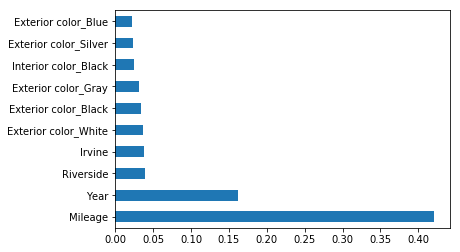

In [25]:
import pandas as pd
import numpy as np

A = cars1.drop('Price', axis = 1)  #independent columns
B = np.array(cars1['Price'])    #target column (price range)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(A,B)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=A.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [40]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

X = cars1[['Mileage','Year','Exterior color_Black','Irvine', 'Riverside','Interior color_Black',
          'Exterior color_Silver','Exterior color_Blue','Exterior color_White','Exterior color_Gray']]
y = cars1['Price']
# Saving feature (X2)names for later use
feature_list1 = list(X.columns)
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.25) 

In [27]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (474, 10)
X_test (158, 10)
y_train (474,)
y_test (158,)


##### Logistic Regression

In [28]:
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred_log_reg=clf.predict(X_test)
losgistic_regression_score=round(clf.score(X_train,y_train)*100,2)
print(losgistic_regression_score)

/Users/ailing/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ailing/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


7.81


##### Support Vector Machine

In [29]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
support_vector_machine_score = round(clf.score(X_train, y_train) * 100, 2)
print (support_vector_machine_score )

/Users/ailing/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


80.17


##### Linear regression

In [30]:
clf=sklearn.linear_model.LinearRegression()
clf.fit(X_train, y_train)
y_pred_linear=clf.predict(X_test)
linear_regression_score=round(clf.score(X_train, y_train)*100,2)
print(linear_regression_score)

34.69


##### K Nearest Neighbors

In [32]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
knn_score = round(clf.score(X_train, y_train) * 100, 2)
print (knn_score )

41.98


##### Decision Tree

In [33]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
decision_tree_score = round(clf.score(X_train, y_train) * 100, 2)
print (decision_tree_score)

94.09


##### Random Forest

In [35]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
random_forest_score = round(clf.score(X_train, y_train) * 100, 2)
print (random_forest_score)

94.09


##### Gaussian Naive Bayes

In [36]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
gaussian_naive_bayes_score = round(clf.score(X_train, y_train) * 100, 2)
print (gaussian_naive_bayes_score)

78.9


##### Put all the scores into one dataframe
We can also see that Random Forest and Decision Tree have the highest socre for feature selection model. The scores are slightly higher than our hypothesis model. For the same reason mentioned above. We will be using Random Forest for our model.

In [37]:
ranks = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 
              'K Nearest Neighbor', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Linear regression'
              ],
    
    'Score': [losgistic_regression_score, support_vector_machine_score, knn_score, 
              decision_tree_score, random_forest_score,gaussian_naive_bayes_score,linear_regression_score]
              
    })

ranks

,Model,Score
0,Logistic Regression,7.81
1,Support Vector Machines,80.17
2,K Nearest Neighbor,41.98
3,Decision Tree,94.09
4,Random Forest,94.09
5,Naive Bayes,78.90
6,Linear regression,34.69


#### Visualize Decision Tree and Random Forest

In [41]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'feature_selection_tree.dot', feature_names = feature_list1, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('feature_selection_tree.dot')
# Write graph to a png file
graph.write_png('feature_selection_tree.png')
tree

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1722442113, splitter='best')

In [43]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'feature_selection_small_tree.dot', feature_names = feature_list1, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('feature_selection_small_tree.dot')
graph.write_png('feature_selection_small_tree.png')